In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv('train.csv')

C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\1658324130.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


In [4]:
train_data.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

In [5]:
print(train_data.shape)
cols = train_data.columns
train_data.info()

(100000, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 



---

Data Cleaning and Processing


---



**1. Replace Special characters with Null**

In [6]:
for i in cols:
  if train_data[i].dtype == object and i not in ['ID', 'Customer_ID', 'Month']:
    print(train_data[i].value_counts())

Name
Langep            44
Stevex            44
Vaughanl          39
Jessicad          39
Raymondr          38
                  ..
Alina Selyukhg     4
Habboushg          4
Mortimerq          4
Ronaldf            4
Timothyl           3
Name: count, Length: 10139, dtype: int64
Age
38      2833
28      2829
31      2806
26      2792
32      2749
        ... 
471        1
1520       1
8663       1
3363       1
1342       1
Name: count, Length: 1788, dtype: int64
SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64
Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6

In [7]:
train_data['Credit_Mix'].replace('_', np.nan, inplace = True)
train_data['Changed_Credit_Limit'].replace('_', np.nan, inplace = True)
train_data['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan, inplace = True)
train_data["Payment_Behaviour"].replace("!@9#%8", np.nan, inplace = True)
train_data["Amount_invested_monthly"].replace("__10000__", np.nan, inplace = True)
train_data["SSN"].replace("#F%$D@*&8", np.nan, inplace = True)
train_data["Occupation"].replace("_______", np.nan, inplace = True)

train_data["Age"] = train_data["Age"].apply(lambda x: x.replace('_', ''))
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].apply(lambda x: x.replace('_', ''))
train_data["Annual_Income"] = train_data["Annual_Income"].apply(lambda x: x.replace('_', ''))
train_data["Num_of_Loan"] = train_data["Num_of_Loan"].apply(lambda x: x.replace('_', ''))
train_data["Num_of_Delayed_Payment"] = train_data["Num_of_Delayed_Payment"].apply(lambda x: str(x).replace('_', ''))

C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\3477000677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Credit_Mix'].replace('_', np.nan, inplace = True)
C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\3477000677.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

In [8]:
train_data['Annual_Income'].value_counts()

Annual_Income
17816.75      16
22434.16      16
40341.16      16
17273.83      16
109945.32     16
              ..
17079092.0     1
1910572.0      1
20179076.0     1
7980216.0      1
8299495.0      1
Name: count, Length: 13487, dtype: int64

2. Remove Outliers

In [9]:
# train_data["Age"].fillna(0, inplace=True)
train_data["Age"] = train_data["Age"].astype(int)
train_data.loc[(train_data["Age"] > 90) | (train_data["Age"] < 10), "Age"] = np.nan

# train_data["Num_of_Loan"].fillna(0, inplace=True)
train_data["Num_of_Loan"] = train_data["Num_of_Loan"].astype(int)
train_data.drop(train_data.loc[train_data["Num_of_Loan"] > 100].index, axis = 0, inplace = True)
train_data.drop(train_data.loc[train_data["Num_of_Loan"] < 1].index, axis = 0, inplace = True)

train_data['Changed_Credit_Limit'] = train_data['Changed_Credit_Limit'].astype(float)
train_data.drop(train_data[train_data['Changed_Credit_Limit'] < 0].index, axis = 0, inplace = True)

train_data['Num_of_Delayed_Payment'] = train_data['Num_of_Delayed_Payment'].astype(float)
train_data.drop(train_data[train_data['Num_of_Delayed_Payment'] < 0].index, axis = 0, inplace = True)

train_data["Num_Bank_Accounts"] = train_data["Num_Bank_Accounts"].replace(-1, 0)

drop_index = train_data.loc[train_data["Delay_from_due_date"] < 0].index
train_data.drop(drop_index, axis = 0, inplace = True)

train_data.drop(train_data.loc[train_data["Num_Credit_Card"] == 0].index, axis = 0, inplace = True)

3. Handling Misspelled words

In [10]:
print(train_data['Payment_of_Min_Amount'].value_counts())
train_data['Payment_of_Min_Amount'].replace('NM', 'No', inplace = True)
train_data['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    47046
No     25580
NM      9968
Name: count, dtype: int64


C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\1954119353.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Payment_of_Min_Amount'].replace('NM', 'No', inplace = True)


Payment_of_Min_Amount
Yes    47046
No     35548
Name: count, dtype: int64

4. Checking data types of columns

In [11]:
train_data["Num_of_Delayed_Payment"] = train_data["Num_of_Delayed_Payment"].astype(float)
train_data["Annual_Income"] = train_data["Annual_Income"].astype(float)
train_data["Monthly_Balance"] = train_data["Monthly_Balance"].astype(float)
train_data["Amount_invested_monthly"] = train_data["Amount_invested_monthly"].astype(float)
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].astype(float)
train_data["Changed_Credit_Limit"] = train_data["Changed_Credit_Limit"].astype(float)
train_data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                         float64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

5. Remove unwanted categorical columns

In [12]:
drop_cols = ['Name', 'SSN', 'ID', 'Occupation', 'Type_of_Loan']
train_data.drop(drop_cols, axis=1, inplace = True)

6. Encoding Categorical Values

In [13]:
le = LabelEncoder()
encode_cols = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score', 'Month']

for col in encode_cols:
  train_data[col] = le.fit_transform(train_data[col])
train_data['Credit_Score'].value_counts()

Credit_Score
2    43650
1    26029
0    12915
Name: count, dtype: int64

7. Feature Tranformation

In [14]:
def Credit_History_Age(val):
  if val is np.nan:
    return np.nan
  else:
    val_list = str(val).split()
    history_age = int(val_list[0])*12 + int(val_list[3])
    return history_age

train_data['Credit_History_Age'].fillna(np.nan, inplace = True)
train_data['Credit_History_Age'] = train_data['Credit_History_Age'].apply(lambda x: Credit_History_Age(x))
train_data['Credit_History_Age']

C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\1891048976.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Credit_History_Age'].fillna(np.nan, inplace = True)


0        265.0
2        267.0
3        268.0
4        269.0
5        270.0
         ...  
99995    378.0
99996    379.0
99997    380.0
99998    381.0
99999    382.0
Name: Credit_History_Age, Length: 82594, dtype: float64

8. Rename the columns

In [15]:
train_data.rename(columns = {'Credit_History_Age': 'Credit_History_Age_Months'}, inplace = True)

9. Check for missing values and handlle them

In [16]:
train_data.isna().sum()

Customer_ID                      0
Month                            0
Age                           2292
Annual_Income                    0
Monthly_Inhand_Salary        12357
Num_Bank_Accounts                0
Num_Credit_Card                  0
Interest_Rate                    0
Num_of_Loan                      0
Delay_from_due_date              0
Num_of_Delayed_Payment        5752
Changed_Credit_Limit          1728
Num_Credit_Inquiries          1616
Credit_Mix                       0
Outstanding_Debt                 0
Credit_Utilization_Ratio         0
Credit_History_Age_Months     7476
Payment_of_Min_Amount            0
Total_EMI_per_month              0
Amount_invested_monthly       7271
Payment_Behaviour                0
Monthly_Balance               1105
Credit_Score                     0
dtype: int64

In [17]:
Num_of_Delayed_Payment = train_data.groupby('Customer_ID')["Num_of_Delayed_Payment"].mean()
Amount_invested_monthly = train_data.groupby('Customer_ID')["Amount_invested_monthly"].mean()
Monthly_Balance = train_data.groupby('Customer_ID')["Monthly_Balance"].mean()
Credit_History_Age = train_data.groupby('Customer_ID')["Credit_History_Age_Months"].mean()
Changed_Credit_Limit = train_data.groupby('Customer_ID')["Changed_Credit_Limit"].mean()

In [18]:
train_data = train_data[train_data['Customer_ID'] != Amount_invested_monthly.index[Amount_invested_monthly.isna()][0]]
train_data['Amount_invested_monthly'].fillna('change', inplace=True)
fill_Amount_invested_monthly = [Amount_invested_monthly[row['Customer_ID']] if row['Amount_invested_monthly'] == 'change' else row['Amount_invested_monthly'] for index, row in train_data.iterrows()]
train_data['Amount_invested_monthly'] = fill_Amount_invested_monthly

train_data['Monthly_Balance'].fillna('change', inplace=True)
fill_Monthly_Balance = [Monthly_Balance[row['Customer_ID']] if row['Monthly_Balance'] == 'change' else row['Monthly_Balance'] for index, row in train_data.iterrows()]
train_data['Monthly_Balance'] = fill_Monthly_Balance

train_data['Num_of_Delayed_Payment'].fillna(np.nan, inplace=True)
fill_Num_of_Delayed_Payment = [Num_of_Delayed_Payment[row['Customer_ID']] if row['Num_of_Delayed_Payment'] == np.nan else row['Num_of_Delayed_Payment'] for index, row in train_data.iterrows()]
train_data['Num_of_Delayed_Payment'] = fill_Num_of_Delayed_Payment

train_data['Credit_History_Age_Months'].fillna('change', inplace=True)
fill_Credit_History_Age = [Credit_History_Age[row['Customer_ID']] if row['Credit_History_Age_Months'] == 'change' else row['Credit_History_Age_Months'] for index, row in train_data.iterrows()]
train_data['Credit_History_Age_Months'] = fill_Credit_History_Age

train_data['Changed_Credit_Limit'].fillna('change', inplace=True)
fill_Changed_Credit_Limit = [Credit_History_Age[row['Customer_ID']] if row['Changed_Credit_Limit'] == 'change' else row['Changed_Credit_Limit'] for index, row in train_data.iterrows()]
train_data['Changed_Credit_Limit'] = fill_Changed_Credit_Limit

train_data['Num_Credit_Inquiries'].fillna(0, inplace = True)
train_data['Num_of_Delayed_Payment'].fillna(0, inplace = True)
train_data['Age'].ffill(inplace = True)
train_data['Monthly_Inhand_Salary'].ffill(inplace = True)
train_data['Num_of_Loan'].ffill(inplace = True)

C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\3780482815.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Amount_invested_monthly'].fillna('change', inplace=True)
C:\Users\Satya Anudeep Kotaru\AppData\Local\Temp\ipykernel_6864\3780482815.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'change' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_data['Amount_invested

In [19]:
train_data.isnull().sum()

Customer_ID                  0
Month                        0
Age                          0
Annual_Income                0
Monthly_Inhand_Salary        0
Num_Bank_Accounts            0
Num_Credit_Card              0
Interest_Rate                0
Num_of_Loan                  0
Delay_from_due_date          0
Num_of_Delayed_Payment       0
Changed_Credit_Limit         0
Num_Credit_Inquiries         0
Credit_Mix                   0
Outstanding_Debt             0
Credit_Utilization_Ratio     0
Credit_History_Age_Months    0
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Amount_invested_monthly      0
Payment_Behaviour            0
Monthly_Balance              0
Credit_Score                 0
dtype: int64

10. Set Precision

In [20]:
train_data["Annual_Income"] = train_data["Annual_Income"].apply(lambda x: round(x, 2))
train_data["Credit_Utilization_Ratio"] = train_data["Credit_Utilization_Ratio"].apply(lambda x: round(x, 2))
train_data["Monthly_Inhand_Salary"] = train_data["Monthly_Inhand_Salary"].apply(lambda x: round(x, 2))
train_data["Monthly_Balance"] = train_data["Monthly_Balance"].apply(lambda x: round(x, 2))
train_data["Amount_invested_monthly"] = train_data["Amount_invested_monthly"].apply(lambda x: round(x, 2))
train_data["Outstanding_Debt"] = train_data["Outstanding_Debt"].apply(lambda x: round(x, 2))
train_data["Changed_Credit_Limit"] = train_data["Changed_Credit_Limit"].apply(lambda x: round(x, 2))
train_data["Total_EMI_per_month"] = train_data["Total_EMI_per_month"].apply(lambda x: round(x, 2))
train_data["Credit_History_Age_Months"] = train_data["Credit_History_Age_Months"].apply(lambda x: round(x))
train_data["Age"] = train_data["Age"].apply(lambda x: round(x))

11. Check for duplicates

In [21]:
train_data.duplicated().any()

False

12. Reset the index

In [22]:
train_data.reset_index(drop = True, inplace=True)

In [23]:
print(train_data.shape)
train_data.info()

(82593, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82593 entries, 0 to 82592
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                82593 non-null  object 
 1   Month                      82593 non-null  int32  
 2   Age                        82593 non-null  int64  
 3   Annual_Income              82593 non-null  float64
 4   Monthly_Inhand_Salary      82593 non-null  float64
 5   Num_Bank_Accounts          82593 non-null  int64  
 6   Num_Credit_Card            82593 non-null  int64  
 7   Interest_Rate              82593 non-null  int64  
 8   Num_of_Loan                82593 non-null  int32  
 9   Delay_from_due_date        82593 non-null  int64  
 10  Num_of_Delayed_Payment     82593 non-null  float64
 11  Changed_Credit_Limit       82593 non-null  float64
 12  Num_Credit_Inquiries       82593 non-null  float64
 13  Credit_Mix                 82593 n

In [24]:
train_data.head()

Customer_ID  Month  Age  Annual_Income  Monthly_Inhand_Salary  \
0   CUS_0xd40      3   23       19114.12                1824.84   
1   CUS_0xd40      6   23       19114.12                1824.84   
2   CUS_0xd40      0   23       19114.12                1824.84   
3   CUS_0xd40      7   23       19114.12                1824.84   
4   CUS_0xd40      5   23       19114.12                1824.84   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Delay_from_due_date  ...  Credit_Mix  Outstanding_Debt  \
0                    3  ...           3            809.98   
1                    3  ...           1            809.98   
2                    5  ...           1            809.98   
3                    6  ...           1            809.98   
4                    8  ...           1            809.98   

   Credit_Utilization_Ratio  Credit_History_Age_Months  Payment_of_Min_Amount  \
0                     26.82                        265                      0   
1                     28.61                        267                      0   
2                     31.38                        268                      0   
3                     24.80                        269                      0   
4                     27.26                        270                      0   

   Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                49.57                    80.42                  2   
1                49.57                    81.70                  4   
2                49.57                   199.46                  5   
3                49.57                    41.42                  1   
4                49.57                    62.43                  6   

   Monthly_Balance  Credit_Score  
0           312.49             0  
1           331.21             0  
2           223.45             0  
3           341.49             0  
4           340.48             0  

[5 rows x 23 columns]




---


**Exploratory Data Analysis**

---




Feature Selection

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

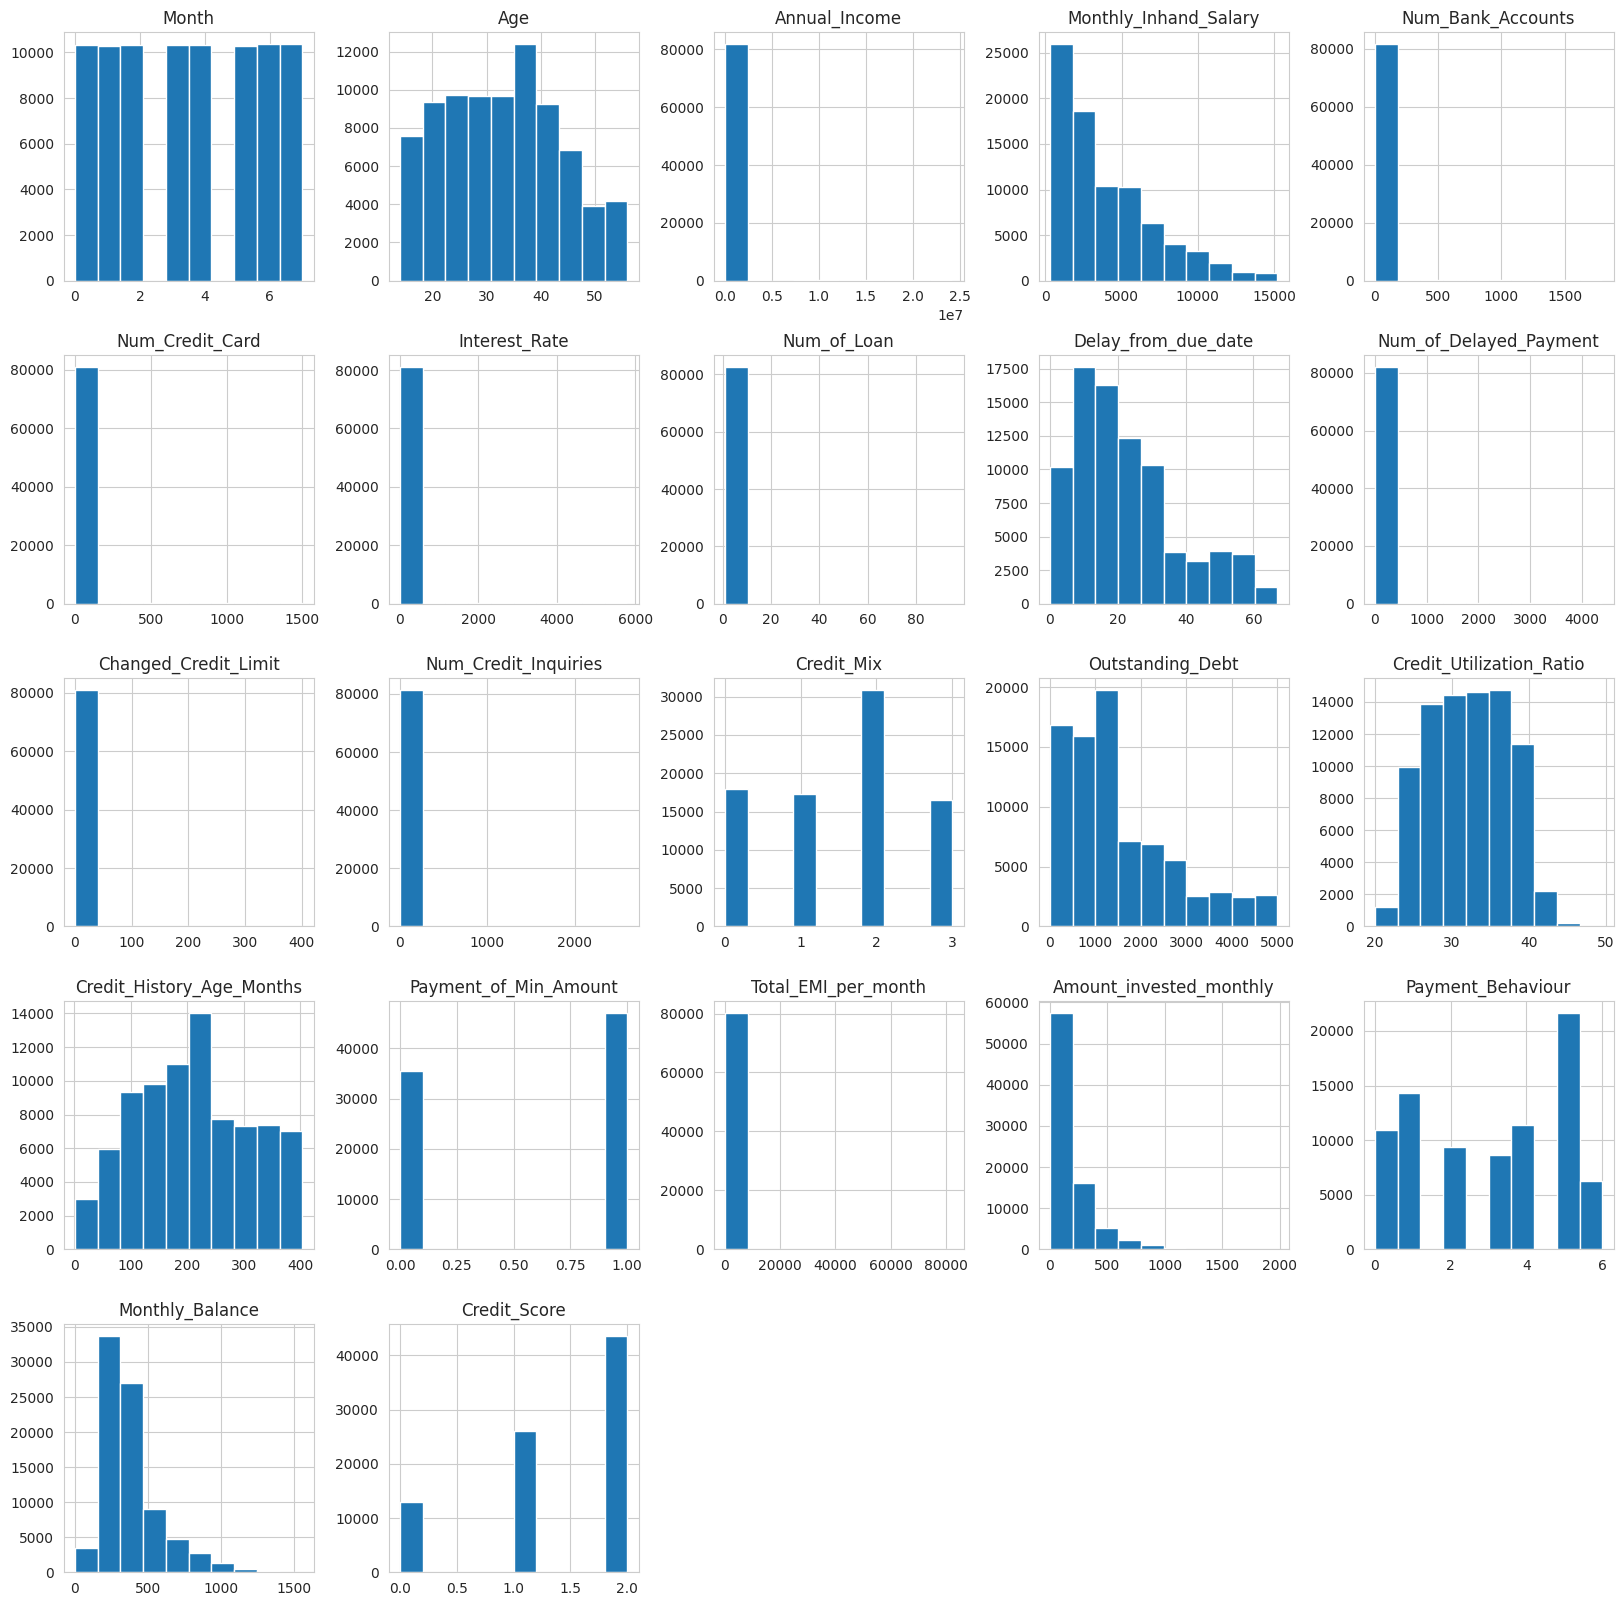

In [ ]:
train_data.hist(figsize=(20, 20))
plt.show()

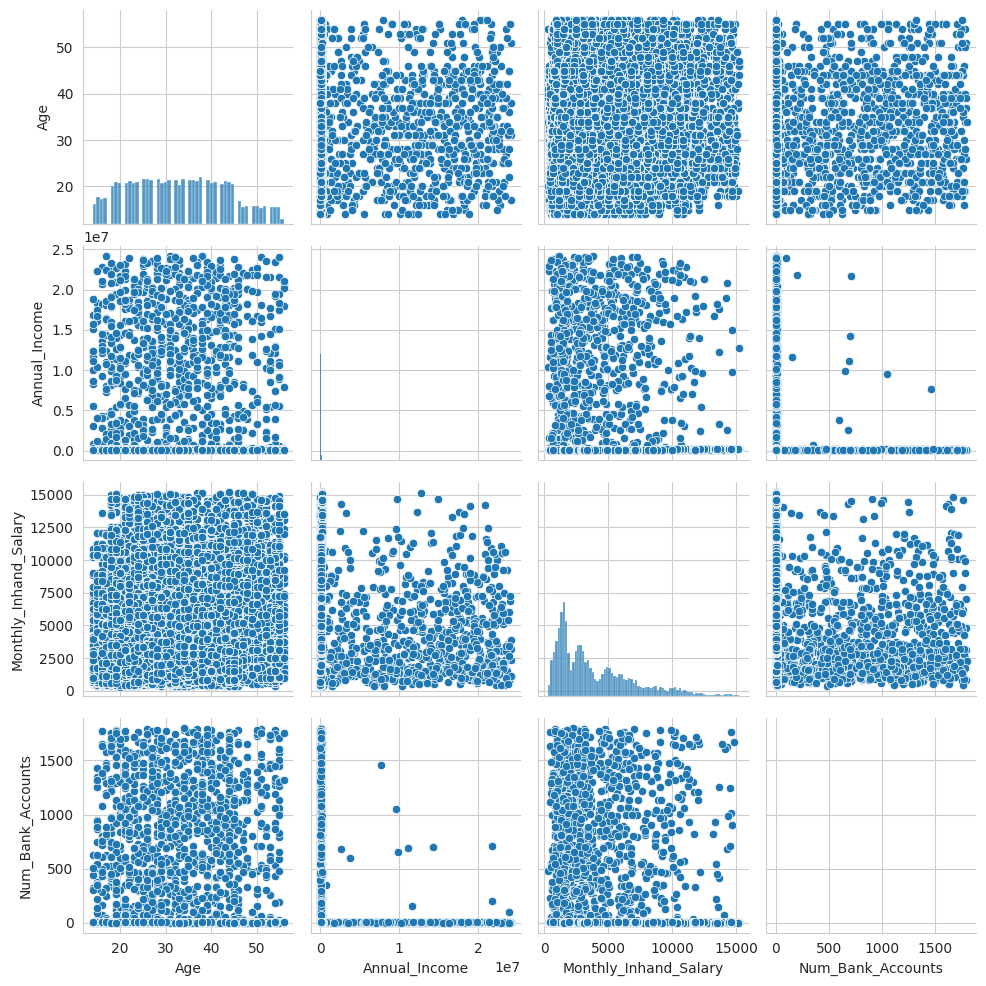

In [ ]:
# Pairplot for a subset of numerical variables
subset_numerical = train_data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts']]
sns.pairplot(subset_numerical)
plt.show()


<ipython-input-90-951523b9bf4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  highest_correlations = train_data.corr()['Credit_Score'].sort_values(ascending=False)[1:11]  # Exclude self-correlation


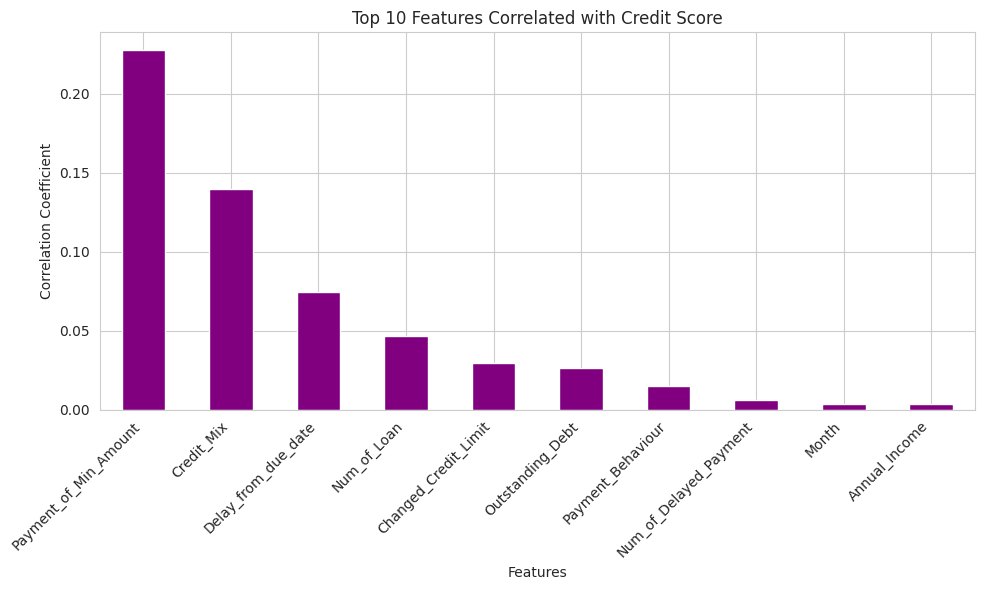

In [ ]:
highest_correlations = train_data.corr()['Credit_Score'].sort_values(ascending=False)[1:11]  # Exclude self-correlation

plt.figure(figsize=(10, 6))
highest_correlations.plot(kind='bar', color='purple')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Top 10 Features Correlated with Credit Score')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


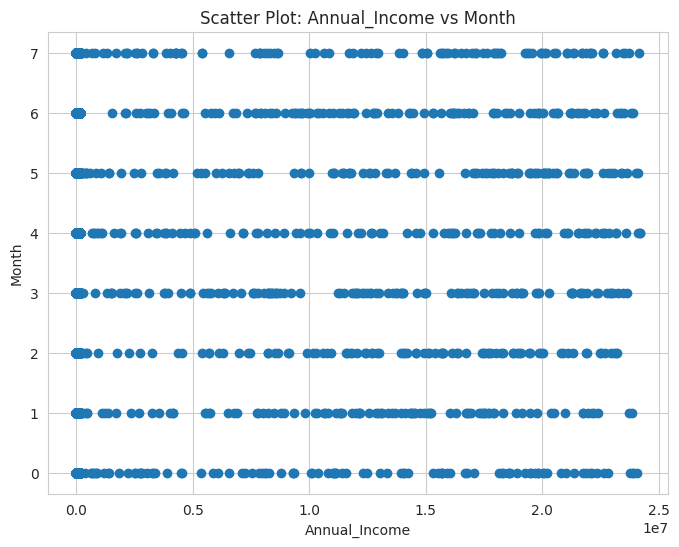

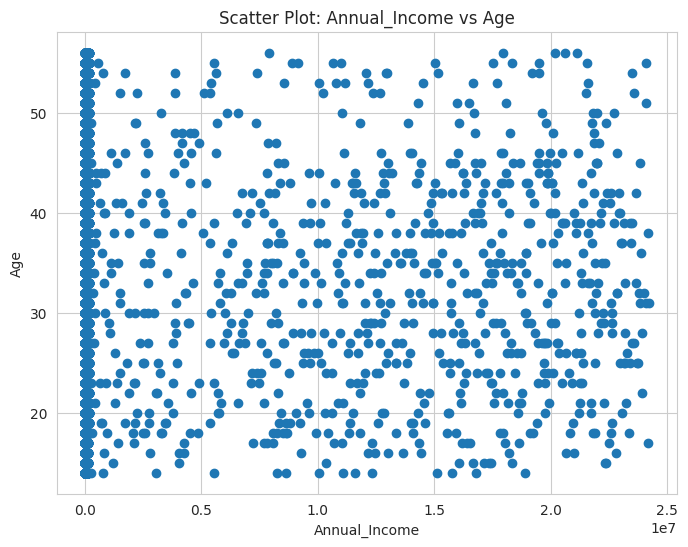

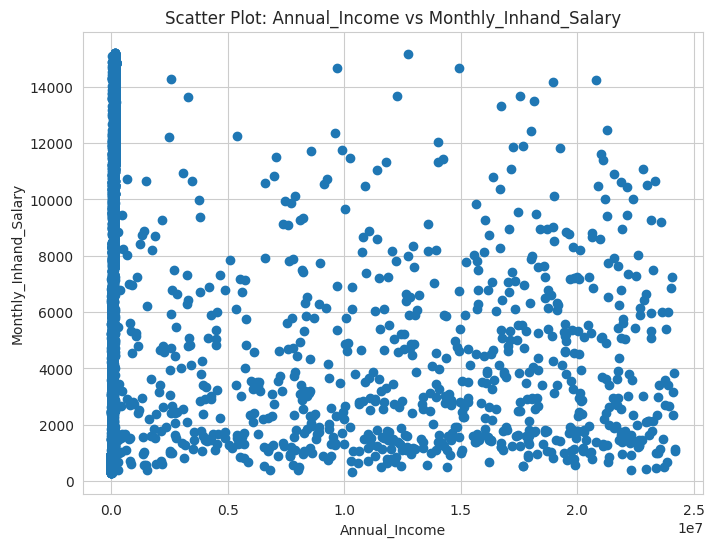

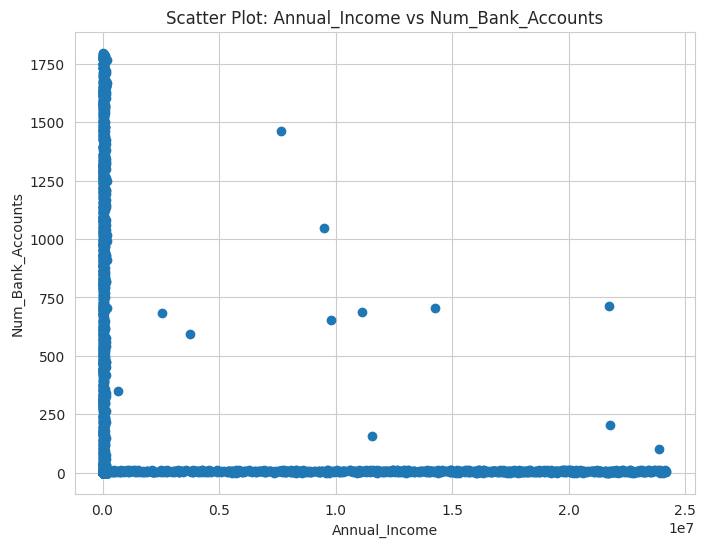

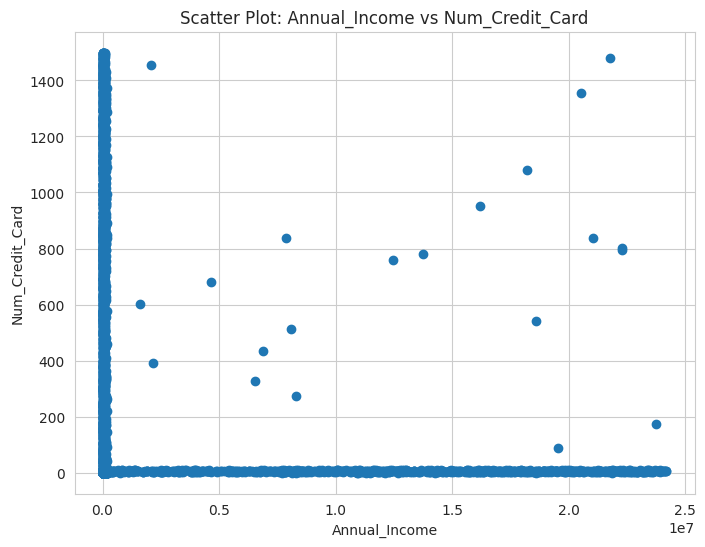

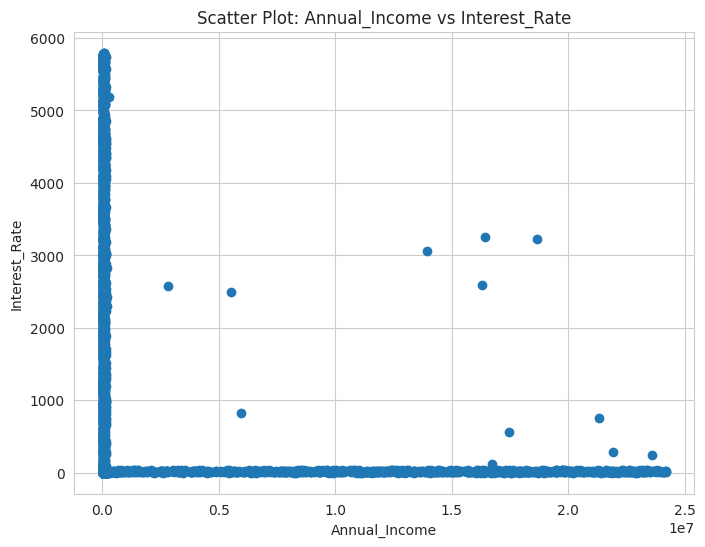

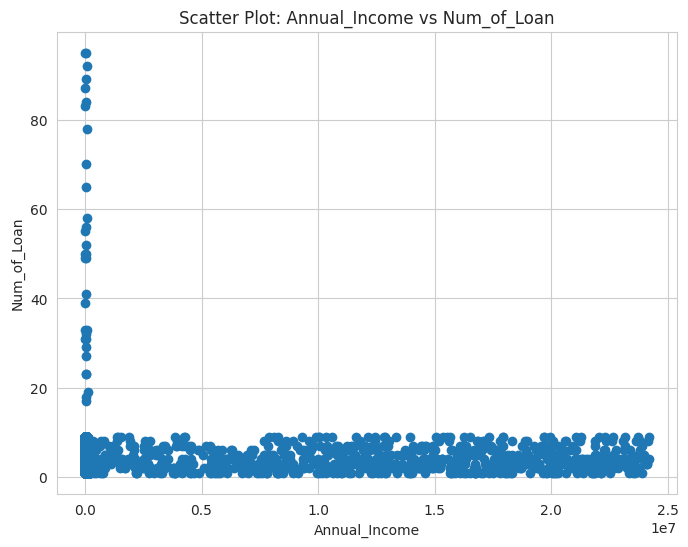

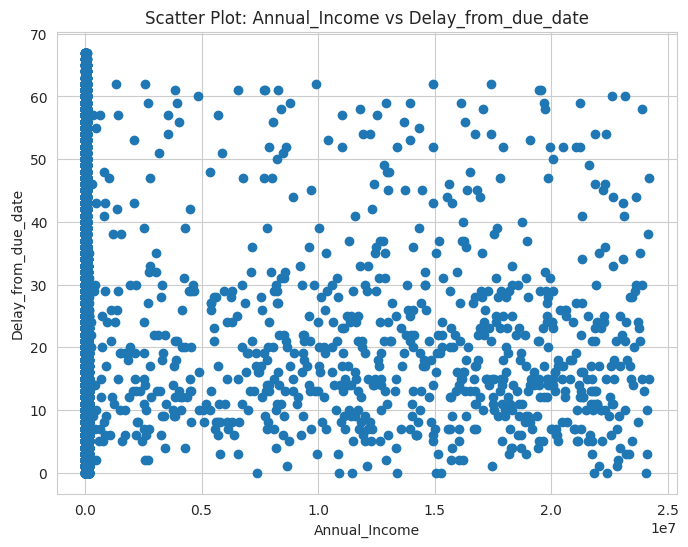

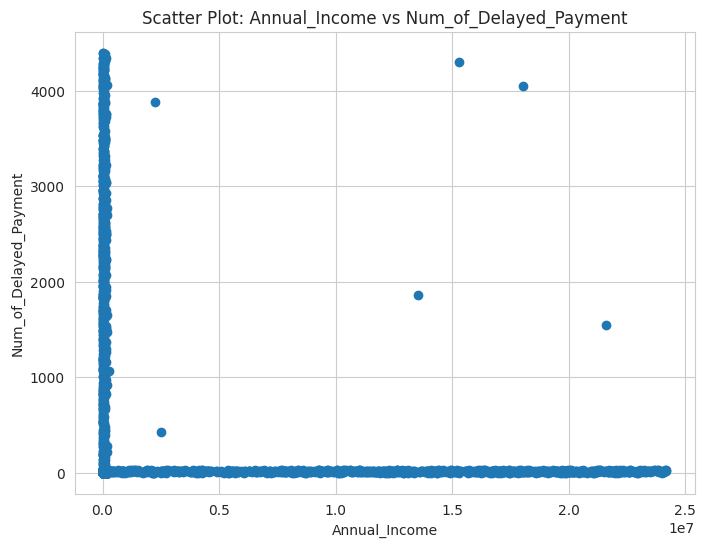

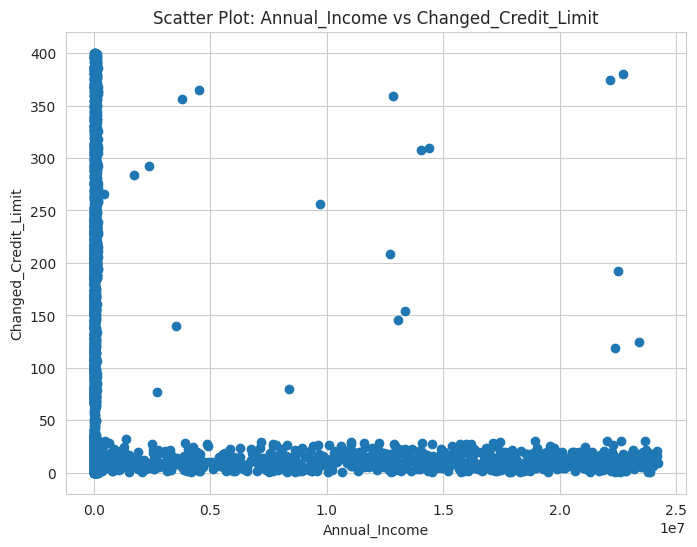

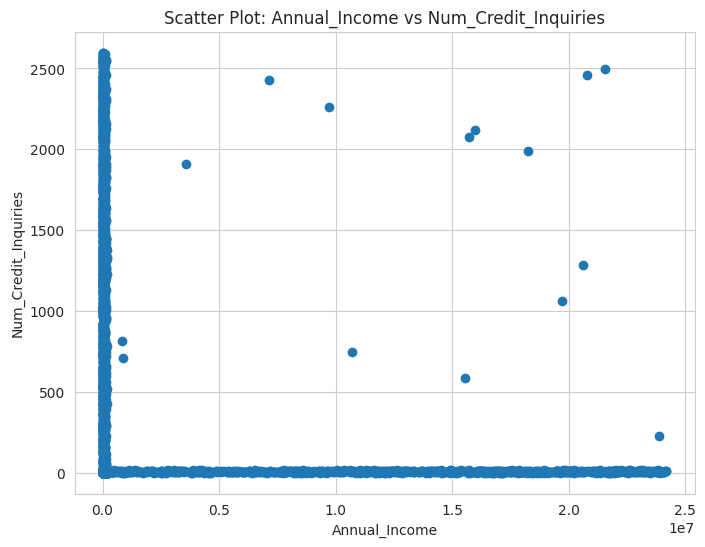

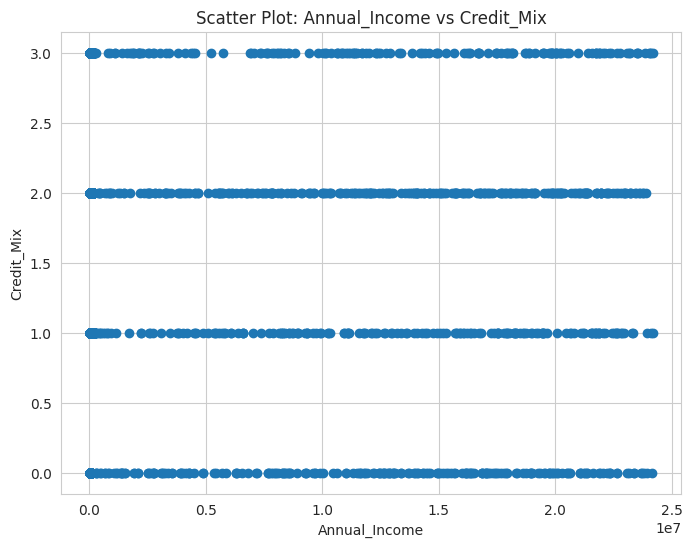

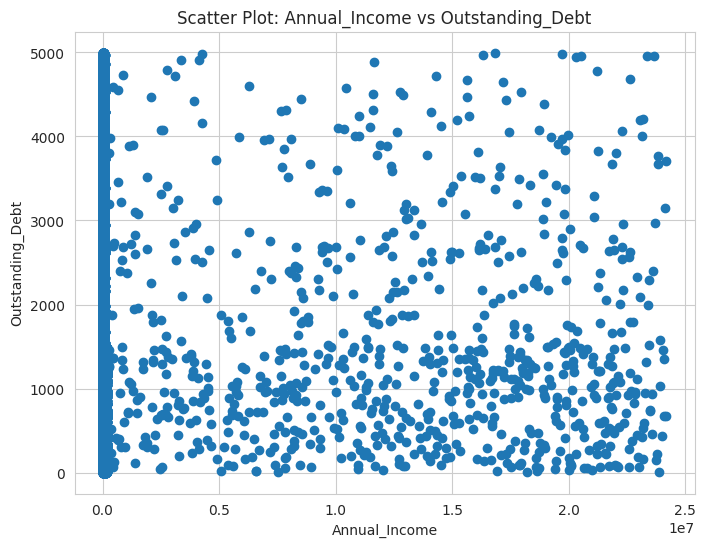

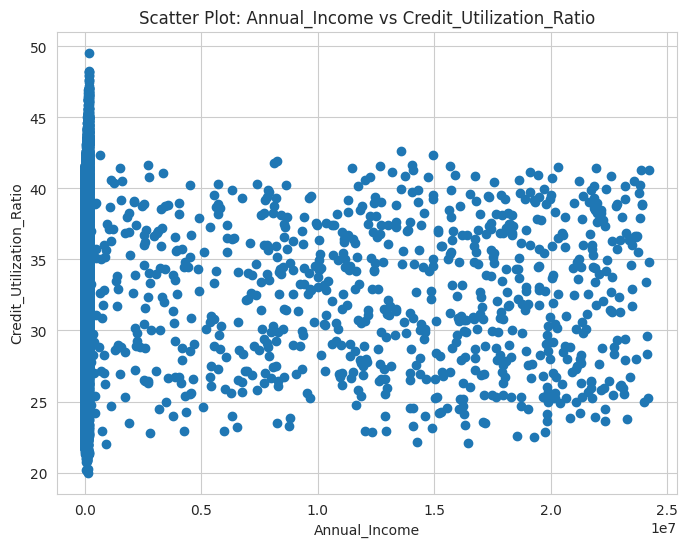

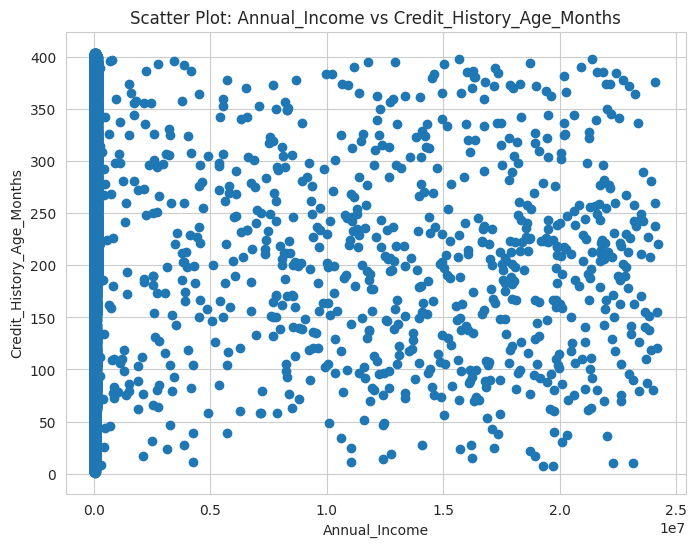

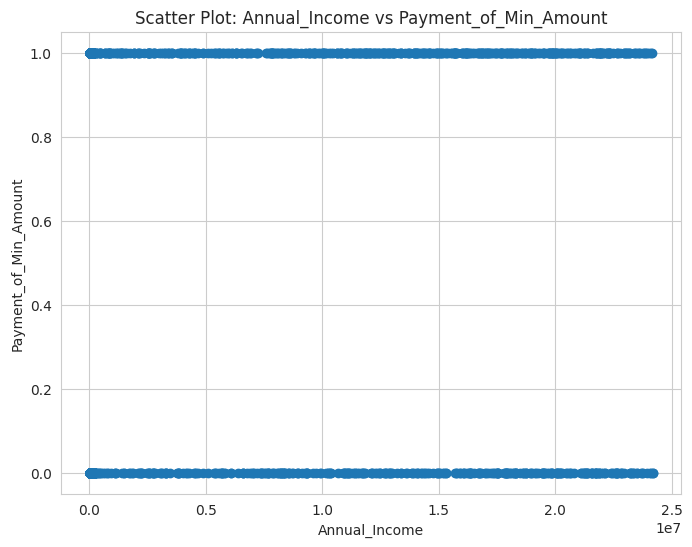

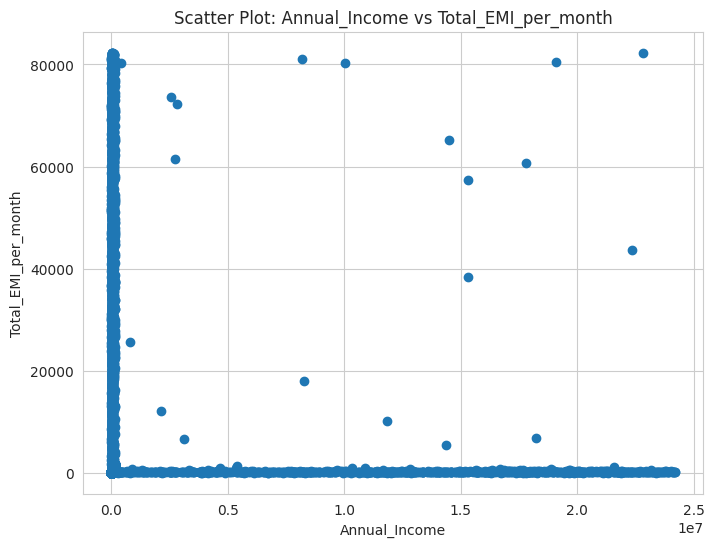

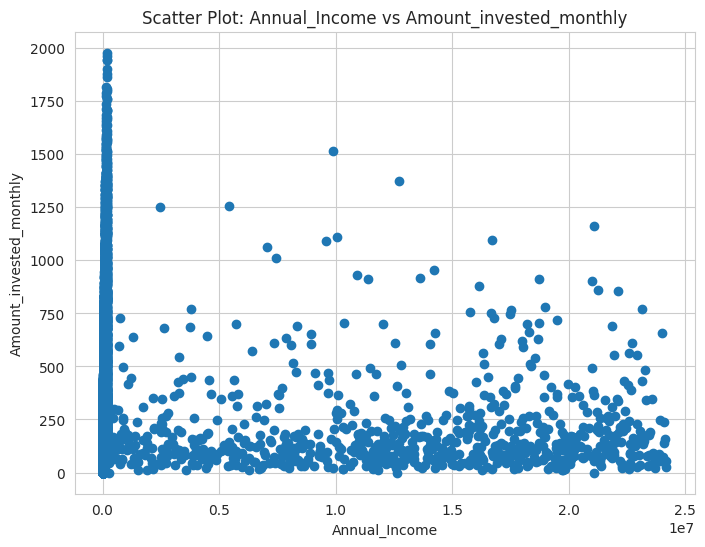

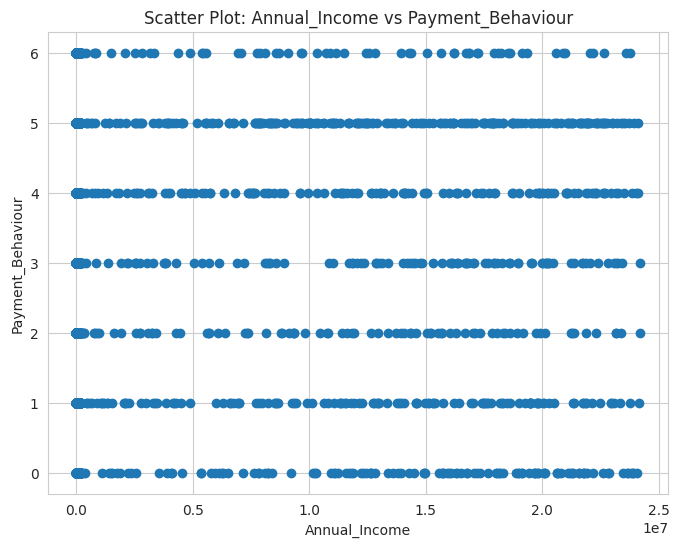

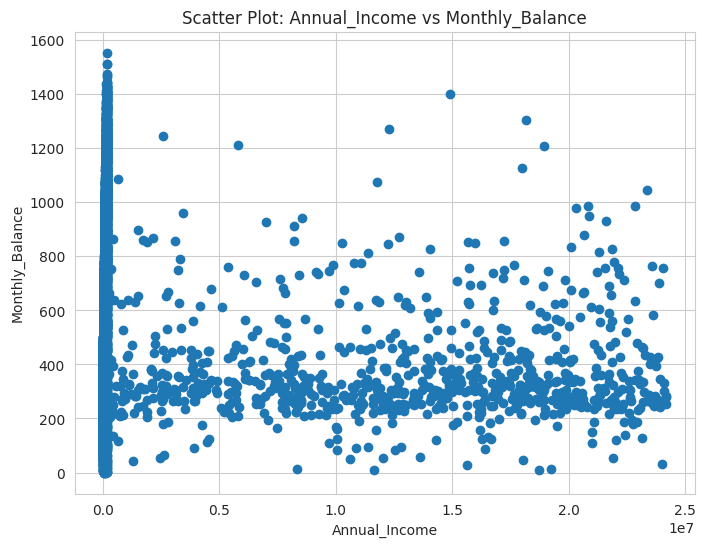

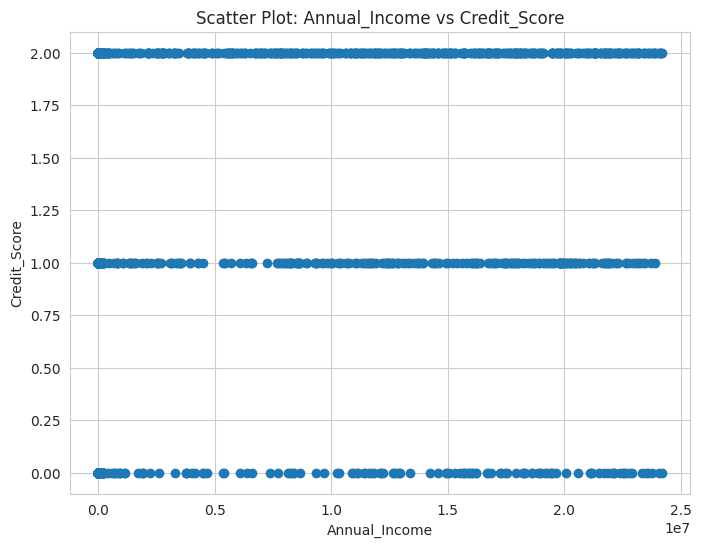

In [ ]:
import matplotlib.pyplot as plt
target_column = 'Annual_Income'

for col in train_data.columns[1:]:
    if col != target_column:
        plt.figure(figsize=(8, 6))
        plt.scatter(train_data[target_column], train_data[col])
        plt.xlabel(target_column)
        plt.ylabel(col)
        plt.title(f"Scatter Plot: {target_column} vs {col}")
        plt.show()
        print("\n")


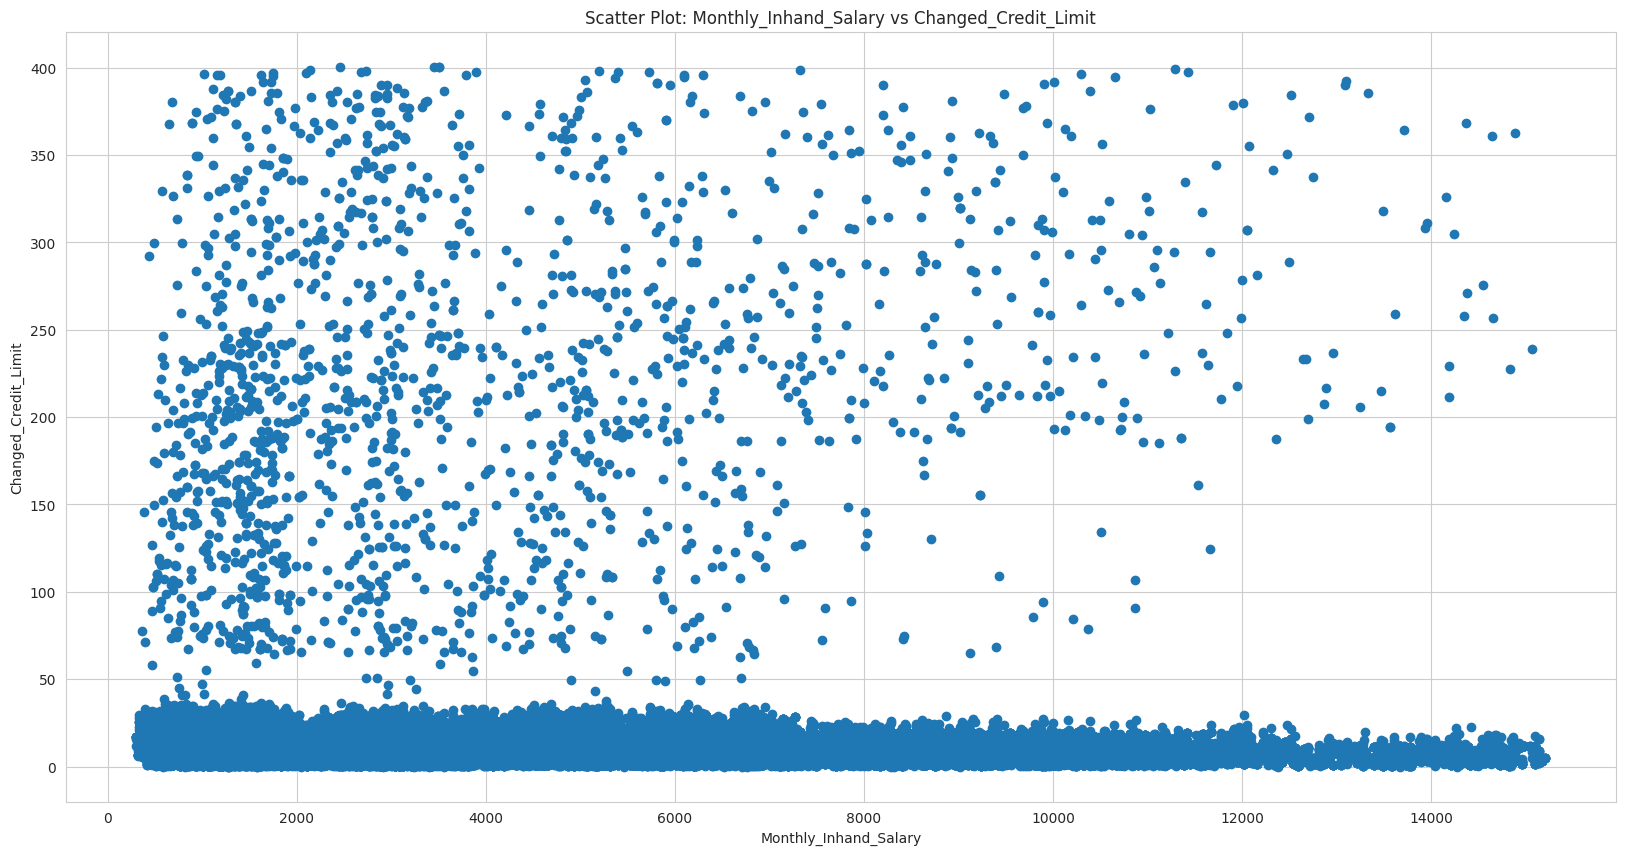

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(train_data['Monthly_Inhand_Salary'], train_data['Changed_Credit_Limit'])
plt.xlabel('Monthly_Inhand_Salary')
plt.ylabel('Changed_Credit_Limit')
plt.title('Scatter Plot: Monthly_Inhand_Salary vs Changed_Credit_Limit')

plt.show()

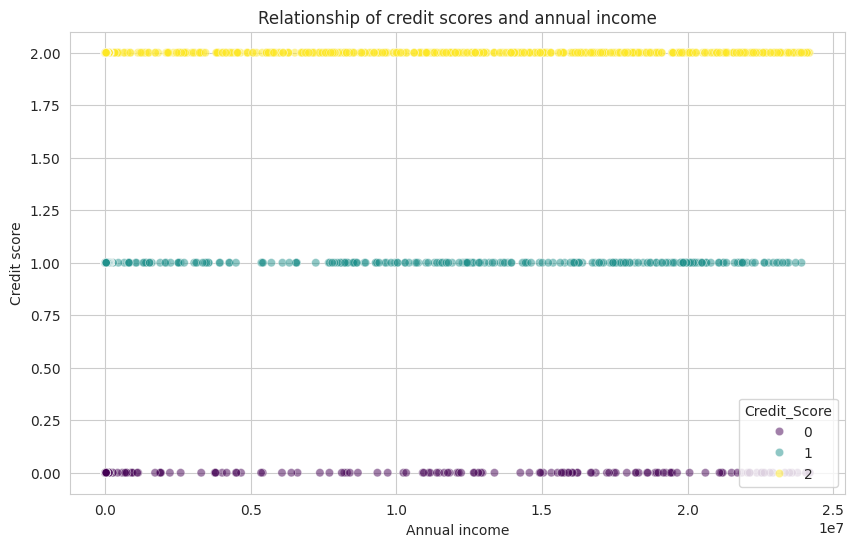

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_data['Annual_Income'], y=train_data['Credit_Score'], hue=train_data['Credit_Score'], palette='viridis', alpha=0.5)
plt.title('Relationship of credit scores and annual income')
plt.xlabel('Annual income')
plt.ylabel('Credit score')
plt.show()

<ipython-input-94-ff4b8943a037>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


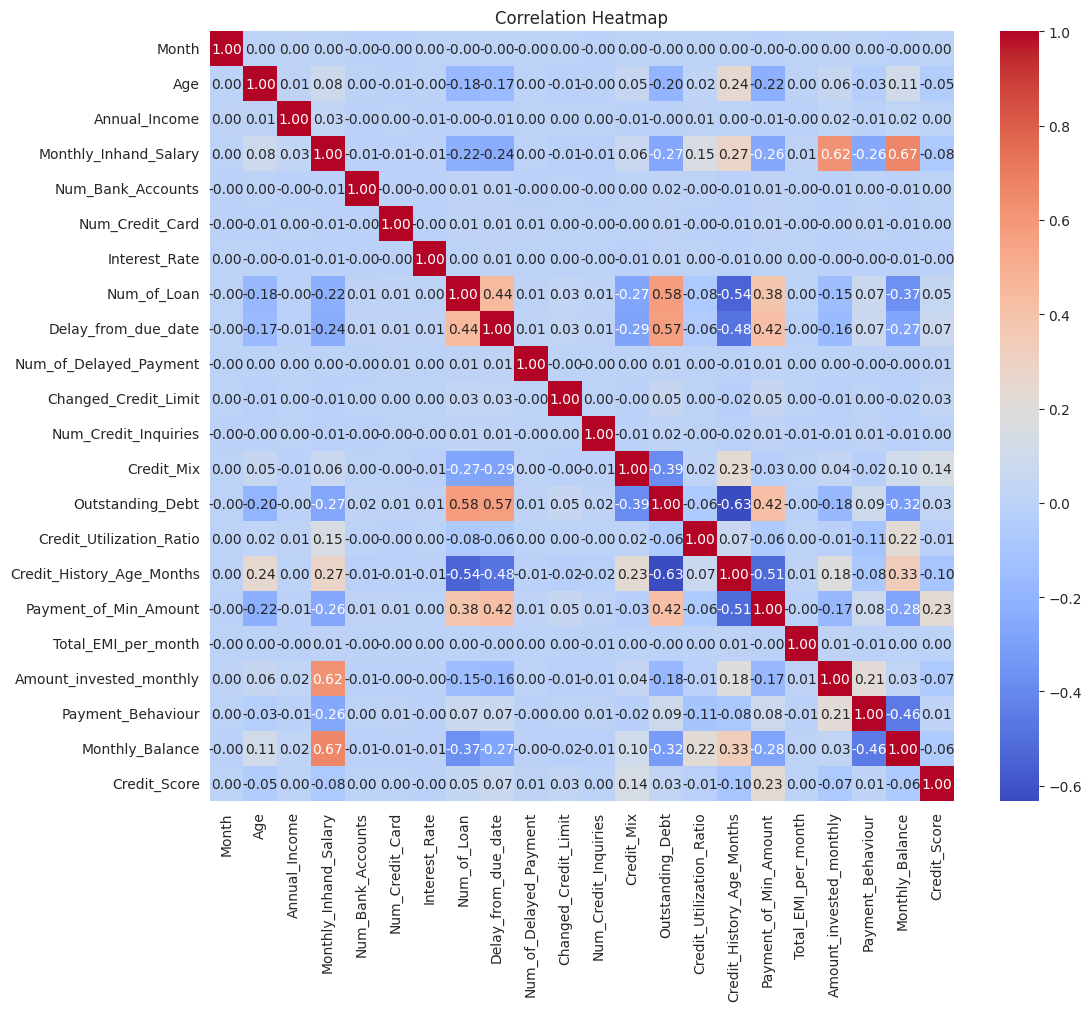

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


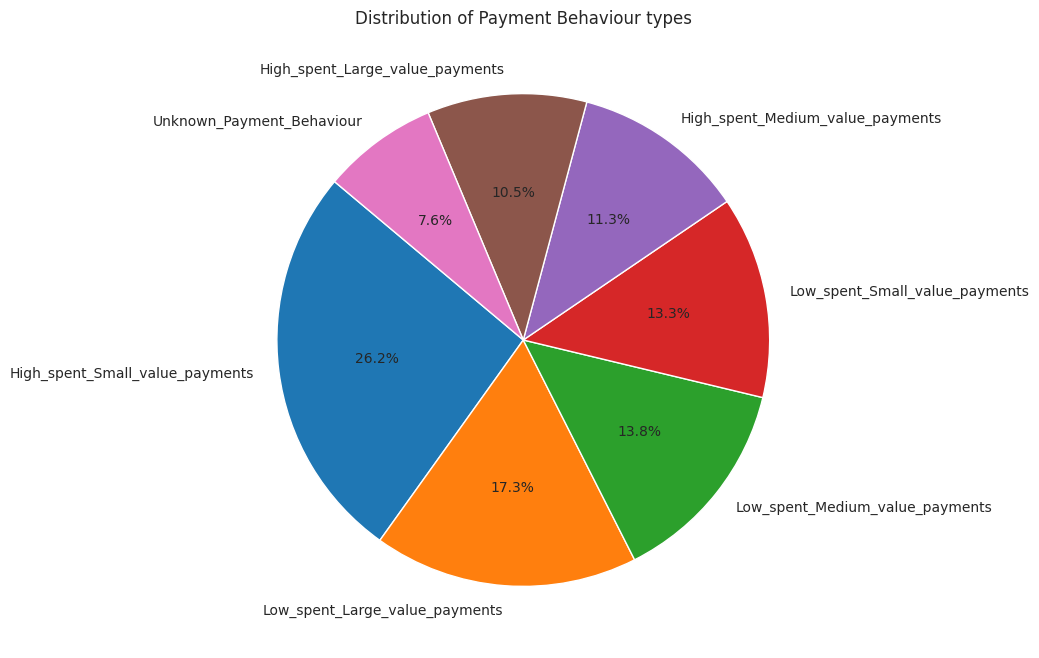

In [ ]:
original_labels = ['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Large_value_payments','Unknown_Payment_Behaviour']

p_counts = train_data['Payment_Behaviour'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(p_counts, labels=original_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Behaviour types')
plt.show()

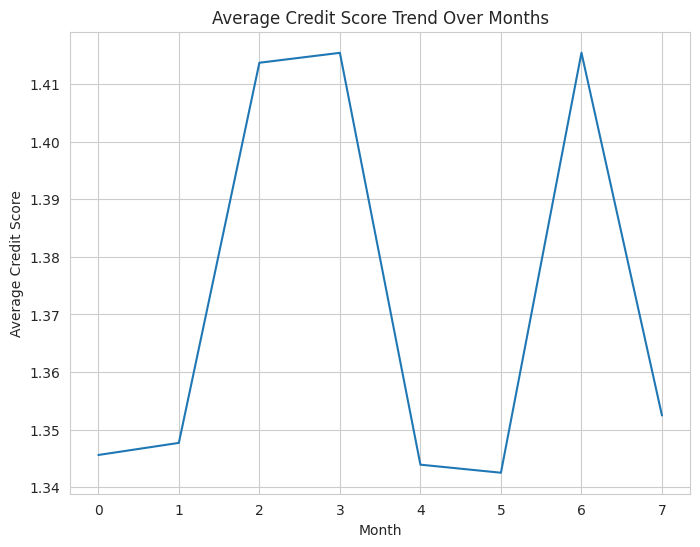

In [ ]:
monthly_avg_score = train_data.groupby('Month')['Credit_Score'].mean()

plt.figure(figsize=(8, 6))
plt.plot(monthly_avg_score.index, monthly_avg_score.values)
plt.xlabel('Month')
plt.ylabel('Average Credit Score')
plt.title('Average Credit Score Trend Over Months')
plt.grid(True)
plt.show()


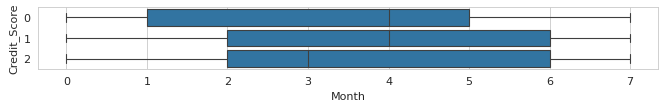

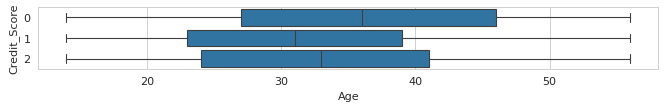

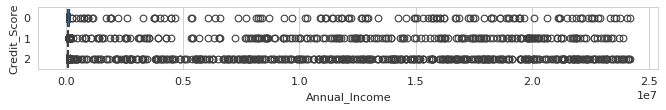

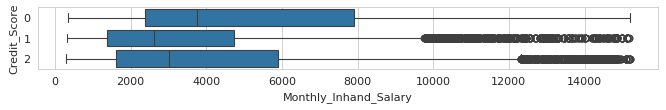

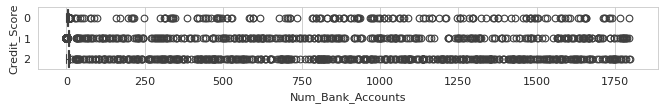

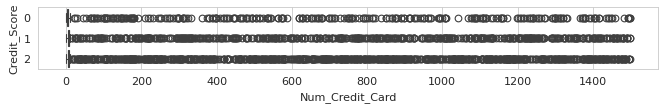

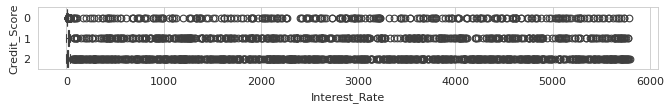

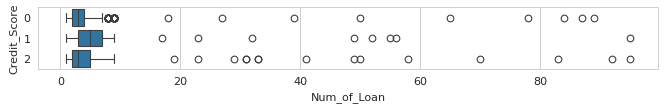

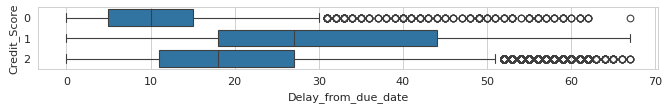

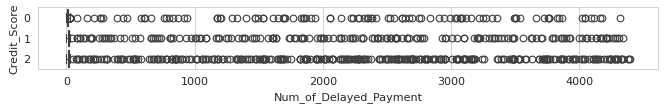

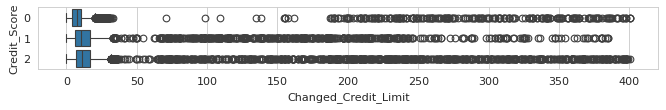

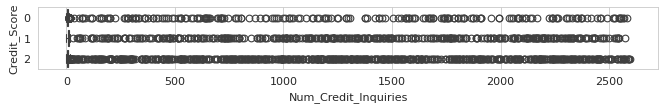

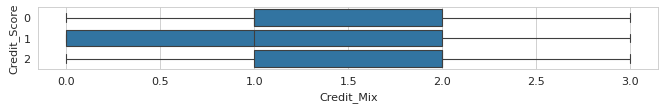

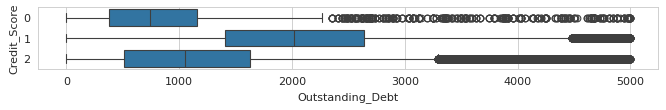

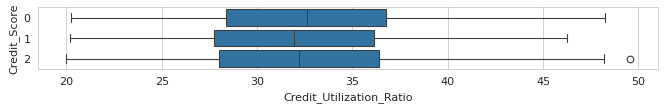

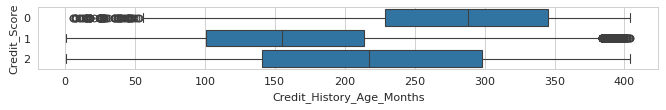

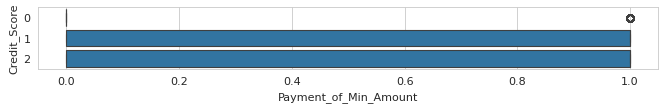

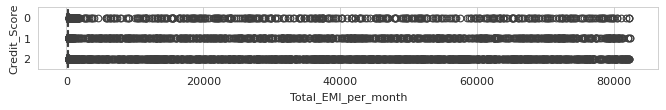

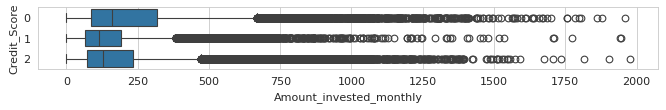

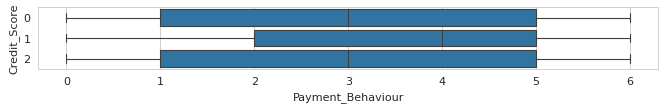

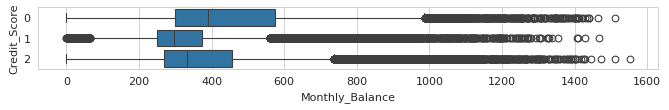

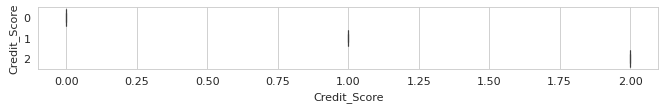

In [ ]:
# Show the outliers using Box plot
numerical_data = list()

for column in train_data.columns:
    if train_data.dtypes[column] != 'object':
        numerical_data.append(column)

for i in range(0,len(numerical_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = train_data[numerical_data[i]], y=train_data['Credit_Score'], data = train_data,orient="h")
    plt.show()
    print("\n")

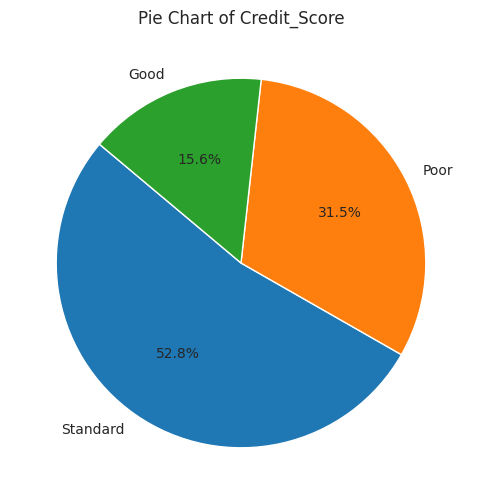

In [ ]:
plt.figure(figsize=(10, 6))
interest_rate_counts = train_data['Credit_Score'].value_counts()
plt.pie(interest_rate_counts, labels=["Standard", "Poor", "Good"], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Credit_Score')
plt.show()

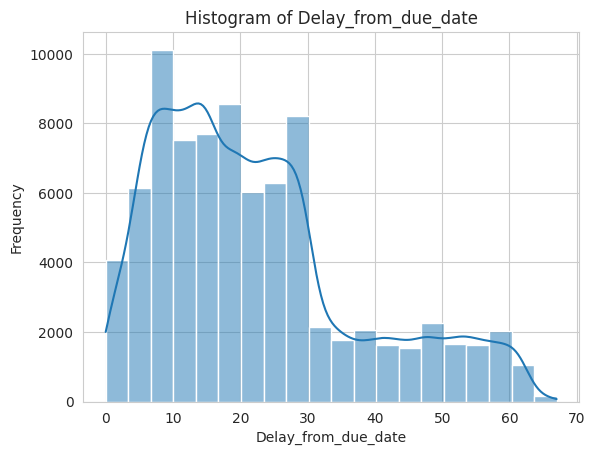

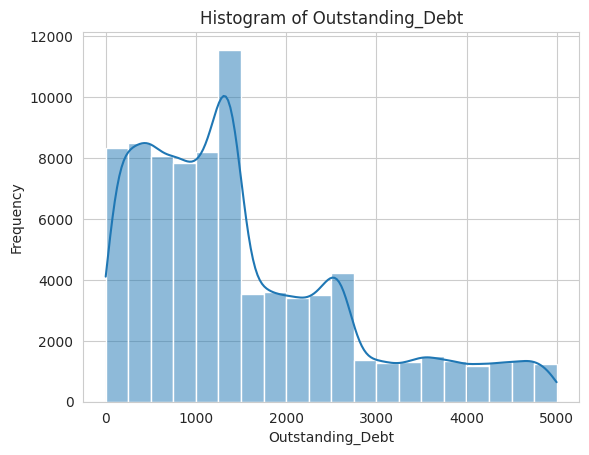

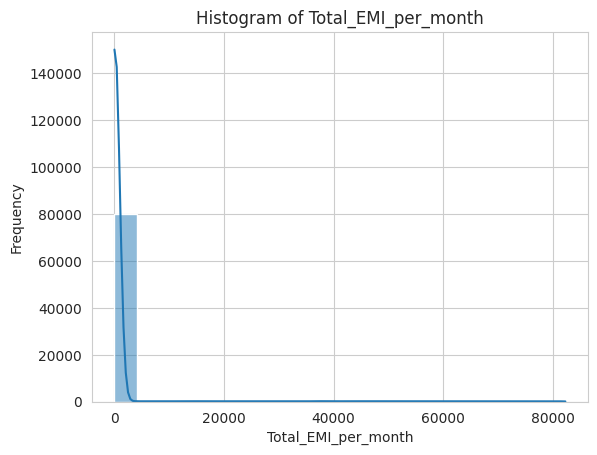

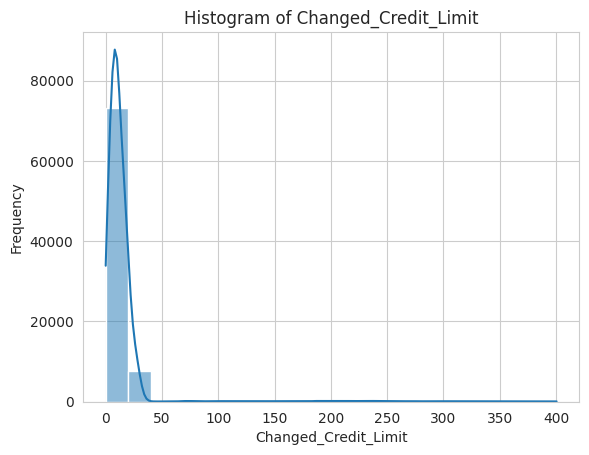

In [ ]:
import seaborn as sns

sns.histplot(train_data['Delay_from_due_date'], bins=20, kde=True)
plt.title('Histogram of Delay_from_due_date')
plt.xlabel('Delay_from_due_date')
plt.ylabel('Frequency')
plt.show()

sns.histplot(train_data['Outstanding_Debt'], bins=20, kde=True)
plt.title('Histogram of Outstanding_Debt')
plt.xlabel('Outstanding_Debt')
plt.ylabel('Frequency')
plt.show()

sns.histplot(train_data['Total_EMI_per_month'], bins=20, kde=True)
plt.title('Histogram of Total_EMI_per_month')
plt.xlabel('Total_EMI_per_month')
plt.ylabel('Frequency')
plt.show()

sns.histplot(train_data['Changed_Credit_Limit'], bins=20, kde=True)
plt.title('Histogram of Changed_Credit_Limit')
plt.xlabel('Changed_Credit_Limit')
plt.ylabel('Frequency')
plt.show()

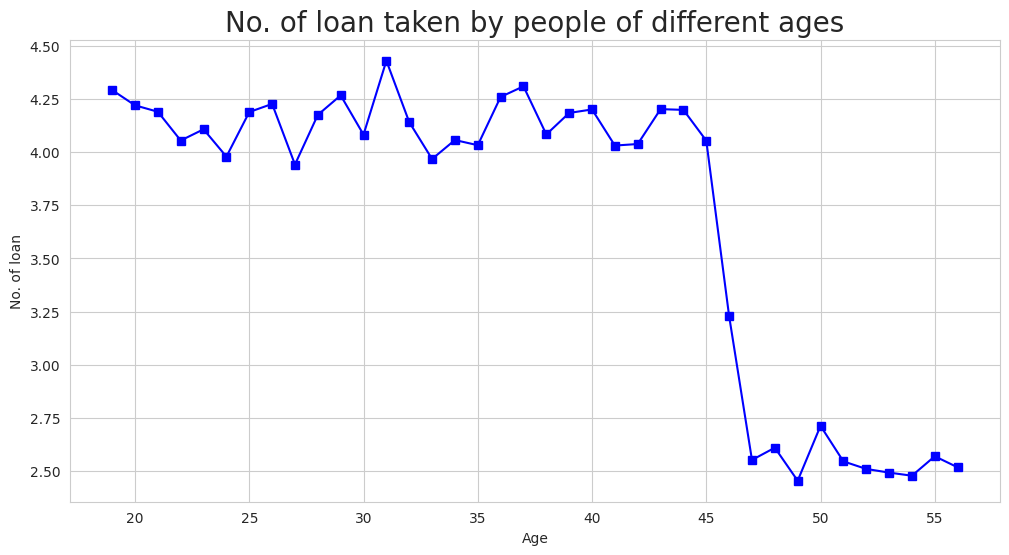

In [ ]:
s_df = train_data.groupby('Age')['Num_of_Loan'].mean().reset_index()
adult = s_df[s_df.Age > 18]
age_range = adult[adult['Age'].isin(np.arange(18,65))]
age_range.Num_of_Loan

sns.set_style("whitegrid")
plt.figure(figsize=(12,6))
plt.xlabel('Age')
plt.ylabel('No. of loan')

plt.title("No. of loan taken by people of different ages", fontsize = 20)

plt.plot(age_range.Age, age_range.Num_of_Loan, 's-b');

In [25]:
train_data.describe()

Month           Age  Annual_Income  Monthly_Inhand_Salary  \
count  82593.000000  82593.000000   8.259300e+04           82593.000000   
mean       3.503481     32.847638   1.747195e+05            4037.678848   
std        2.292210     10.624279   1.438332e+06            3101.016446   
min        0.000000     14.000000   7.005930e+03             303.650000   
25%        2.000000     24.000000   1.884362e+04            1571.670000   
50%        4.000000     33.000000   3.632013e+04            3000.940000   
75%        6.000000     41.000000   6.995692e+04            5729.910000   
max        7.000000     56.000000   2.419806e+07           15204.630000   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate   Num_of_Loan  \
count        82593.00000     82593.000000   82593.000000  82593.000000   
mean            17.29241        22.482922      74.192086      4.030414   
std            117.24830       128.450856     470.374626      2.459434   
min              0.00000         1.000000       1.000000      1.000000   
25%              4.00000         4.000000       8.000000      2.000000   
50%              6.00000         6.000000      15.000000      4.000000   
75%              8.00000         7.000000      22.000000      6.000000   
max           1798.00000      1499.000000    5797.000000     95.000000   

       Delay_from_due_date  Num_of_Delayed_Payment  ...    Credit_Mix  \
count         82593.000000            82593.000000  ...  82593.000000   
mean             22.272735               29.593198  ...      1.557929   
std              15.181142              220.106439  ...      1.040032   
min               0.000000                0.000000  ...      0.000000   
25%              11.000000                8.000000  ...      1.000000   
50%              19.000000               14.000000  ...      2.000000   
75%              29.000000               18.000000  ...      2.000000   
max              67.000000             4397.000000  ...      3.000000   

       Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age_Months  \
count      82593.000000              82593.000000               82593.000000   
mean        1526.149265                 32.162890                 211.184786   
std         1196.891727                  5.073298                  99.875824   
min            0.230000                 20.000000                   1.000000   
25%          615.140000                 27.960000                 132.000000   
50%         1257.590000                 32.180000                 209.000000   
75%         2169.860000                 36.380000                 289.000000   
max         4998.070000                 49.560000                 404.000000   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
count           82593.000000         82593.000000             82593.000000   
mean                0.569612          1407.617135               189.697228   
std                 0.495133          8275.092415               190.087015   
min                 0.000000             0.000000                 0.000000   
25%                 0.000000            41.740000                72.510000   
50%                 1.000000            79.520000               127.100000   
75%                 1.000000           172.530000               230.980000   
max                 1.000000         82331.000000              1977.330000   

       Payment_Behaviour  Monthly_Balance  Credit_Score  
count       82593.000000     82593.000000  82593.000000  
mean            3.031431       381.782042      1.372138  
std             1.966928       195.523869      0.739170  
min             0.000000         0.010000      0.000000  
25%             1.000000       264.270000      1.000000  
50%             3.000000       324.590000      2.000000  
75%             5.000000       443.420000      2.000000  
max             6.000000      1552.950000      2.000000  

[8 rows x 22 columns]



---


**Machine learning Algorithms**


---



In [32]:
train_data.to_csv('clean_train_data.csv', index=False)

In [44]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82593 entries, 0 to 82592
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                82593 non-null  int64  
 1   Month                      82593 non-null  int64  
 2   Age                        82593 non-null  int64  
 3   Annual_Income              82593 non-null  float64
 4   Monthly_Inhand_Salary      82593 non-null  float64
 5   Num_Bank_Accounts          82593 non-null  int64  
 6   Num_Credit_Card            82593 non-null  int64  
 7   Interest_Rate              82593 non-null  int64  
 8   Num_of_Loan                82593 non-null  int64  
 9   Delay_from_due_date        82593 non-null  int64  
 10  Num_of_Delayed_Payment     82593 non-null  float64
 11  Changed_Credit_Limit       82593 non-null  float64
 12  Num_Credit_Inquiries       82593 non-null  float64
 13  Credit_Mix                 82593 non-null  int

In [43]:
clean_data = pd.read_csv('clean_train_data.csv')
clean_data.head()

Customer_ID  Month  Age  Annual_Income  Monthly_Inhand_Salary  \
0        10916      3   23       19114.12                1824.84   
1        10916      6   23       19114.12                1824.84   
2        10916      0   23       19114.12                1824.84   
3        10916      7   23       19114.12                1824.84   
4        10916      5   23       19114.12                1824.84   

   Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

   Delay_from_due_date  ...  Credit_Mix  Outstanding_Debt  \
0                    3  ...           3            809.98   
1                    3  ...           1            809.98   
2                    5  ...           1            809.98   
3                    6  ...           1            809.98   
4                    8  ...           1            809.98   

   Credit_Utilization_Ratio  Credit_History_Age_Months  Payment_of_Min_Amount  \
0                     26.82                        265                      0   
1                     28.61                        267                      0   
2                     31.38                        268                      0   
3                     24.80                        269                      0   
4                     27.26                        270                      0   

   Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                49.57                    80.42                  2   
1                49.57                    81.70                  4   
2                49.57                   199.46                  5   
3                49.57                    41.42                  1   
4                49.57                    62.43                  6   

   Monthly_Balance  Credit_Score  
0           312.49             0  
1           331.21             0  
2           223.45             0  
3           341.49             0  
4           340.48             0  

[5 rows x 23 columns]

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode the Customer_ID column
label_encoder = LabelEncoder()
train_data['Customer_ID'] = label_encoder.fit_transform(train_data['Customer_ID'])



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

X = train_data.drop(columns=['Credit_Score'])
y = train_data['Credit_Score']
y_labels = ["Good", "Poor", "Standard"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (66074, 22) (66074,)
Testing set shape: (16519, 22) (16519,)


In [37]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

def weighted_metrics(y_test, y_pred):
  result = dict()
  precision = round(precision_score(y_test, y_pred, average='weighted'), 2)
  accuracy = round(accuracy_score(y_test, y_pred), 2)
  recall = round(recall_score(y_test, y_pred, average='weighted'), 2)
  f1 = round(f1_score(y_test, y_pred, average='weighted'), 2)

  result['Accuracy'] = accuracy
  result['Precision'] = precision
  result['Recall'] = recall
  result['F1_score'] = f1
  return result


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

logistic_model = LogisticRegression(C=0.001, penalty='l1', solver='liblinear', class_weight='balanced')

logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred),'\n')

logit_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(logit_metrics, '\n')


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.47      0.67      0.55      2589
           1       0.61      0.58      0.60      5260
           2       0.68      0.61      0.64      8670

    accuracy                           0.61     16519
   macro avg       0.58      0.62      0.60     16519
weighted avg       0.62      0.61      0.61     16519

Confusion Matrix:
[[1733   62  794]
 [ 462 3053 1745]
 [1525 1870 5275]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.61, 'Precision': 0.62, 'Recall': 0.61, 'F1_score': 0.61} 



In [54]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=2)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print("Decision Tree Classifier Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred),'\n')

decision_tree_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(decision_tree_metrics, '\n')



Decision Tree Classifier Results:
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      2589
           1       0.74      0.68      0.71      5260
           2       0.73      0.77      0.75      8670

    accuracy                           0.71     16519
   macro avg       0.69      0.68      0.69     16519
weighted avg       0.71      0.71      0.71     16519

Confusion Matrix:
[[1545   84  960]
 [ 216 3595 1449]
 [ 811 1190 6669]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.71, 'Precision': 0.71, 'Recall': 0.71, 'F1_score': 0.71} 



In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

print("K-Nearest Neighbors Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

knn_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(knn_metrics, '\n')


K-Nearest Neighbors Results:
              precision    recall  f1-score   support

           0       0.48      0.50      0.49      2589
           1       0.62      0.58      0.60      5260
           2       0.67      0.68      0.68      8670

    accuracy                           0.62     16519
   macro avg       0.59      0.59      0.59     16519
weighted avg       0.62      0.62      0.62     16519

Confusion Matrix:
[[1292  169 1128]
 [ 370 3055 1835]
 [1031 1709 5930]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.62, 'Precision': 0.62, 'Recall': 0.62, 'F1_score': 0.62} 



In [59]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_pred = naive_bayes.predict(X_test)

print("Naive Bayes Classifier Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

nb_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(nb_metrics, '\n')


Naive Bayes Classifier Results:
              precision    recall  f1-score   support

           0       0.33      0.36      0.34      2589
           1       0.54      0.73      0.62      5260
           2       0.63      0.47      0.54      8670

    accuracy                           0.54     16519
   macro avg       0.50      0.52      0.50     16519
weighted avg       0.55      0.54      0.54     16519

Confusion Matrix:
[[ 927  212 1450]
 [ 384 3866 1010]
 [1474 3089 4107]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.54, 'Precision': 0.55, 'Recall': 0.54, 'F1_score': 0.54} 



Random Forest Classifier Results:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72      2589
           1       0.79      0.83      0.81      5260
           2       0.81      0.80      0.81      8670

    accuracy                           0.79     16519
   macro avg       0.78      0.78      0.78     16519
weighted avg       0.79      0.79      0.79     16519

Confusion Matrix:
[[1799   15  775]
 [  50 4373  837]
 [ 555 1156 6959]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.79, 'Precision': 0.79, 'Recall': 0.79, 'F1_score': 0.79} 



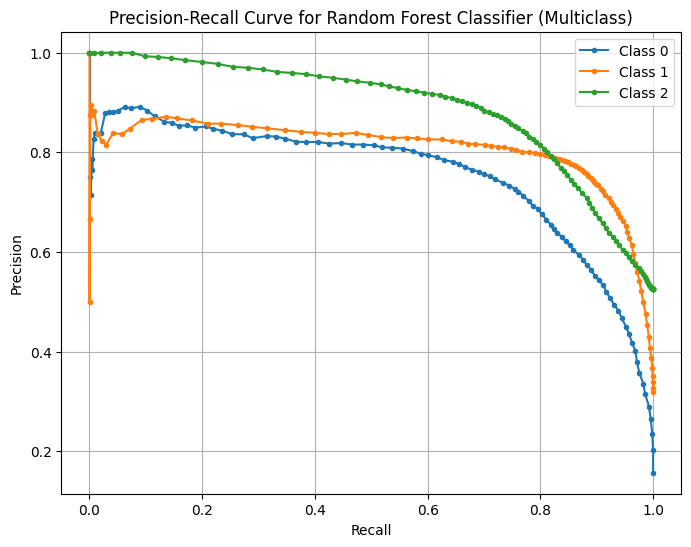

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve

random_forest = RandomForestClassifier(n_estimators=100, min_samples_leaf=1, min_samples_split=2)
random_forest.fit(X_train, y_train)
random_forest_y_pred = random_forest.predict(X_test)


print("Random Forest Classifier Results:")
print(classification_report(y_test, random_forest_y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, random_forest_y_pred), '\n')

random_forest_metrics = weighted_metrics(y_test, random_forest_y_pred)
print("Overall Weighted Average Metrics of the model")
print(random_forest_metrics, '\n')

random_forest_y_proba = random_forest.predict_proba(X_test)


plt.figure(figsize=(8, 6))
for i in range(len(random_forest.classes_)):
    precision, recall, _ = precision_recall_curve((y_test == random_forest.classes_[i]).astype(int), random_forest_y_proba[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {random_forest.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
fs = pd.DataFrame(index=X_train.columns, data=random_forest.feature_importances_, columns=['Feature Importance'])
sorted_fs = fs.sort_values(by='Feature Importance', ascending= False)
sorted_fs

Feature Importance
Outstanding_Debt                     0.114992
Interest_Rate                        0.080755
Credit_History_Age_Months            0.062081
Delay_from_due_date                  0.059948
Changed_Credit_Limit                 0.057570
Credit_Mix                           0.054974
Amount_invested_monthly              0.043931
Monthly_Balance                      0.043531
Credit_Utilization_Ratio             0.042543
Total_EMI_per_month                  0.042225
Customer_ID                          0.041291
Annual_Income                        0.040014
Num_Credit_Inquiries                 0.039872
Monthly_Inhand_Salary                0.039563
Num_Credit_Card                      0.039066
Num_of_Delayed_Payment               0.036986
Age                                  0.035771
Num_Bank_Accounts                    0.033360
Month                                0.026561
Num_of_Loan                          0.025436
Payment_Behaviour                    0.021046
Payment_of_Min_Amount                0.018484

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)

print("Gradient Boosting Classifier Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

gradient_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(gradient_metrics, '\n')


Gradient Boosting Classifier Results:
              precision    recall  f1-score   support

           0       0.61      0.59      0.60      2589
           1       0.75      0.67      0.71      5260
           2       0.73      0.78      0.75      8670

    accuracy                           0.71     16519
   macro avg       0.69      0.68      0.69     16519
weighted avg       0.71      0.71      0.71     16519

Confusion Matrix:
[[1533   29 1027]
 [ 217 3522 1521]
 [ 762 1162 6746]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.71, 'Precision': 0.71, 'Recall': 0.71, 'F1_score': 0.71} 



In [60]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
y_pred = adaboost_classifier.predict(X_test)

print("AdaBoost Classifier Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

adaboost_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(adaboost_metrics, '\n')


AdaBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.58      0.51      0.54      2589
           1       0.67      0.60      0.63      5260
           2       0.67      0.74      0.71      8670

    accuracy                           0.66     16519
   macro avg       0.64      0.62      0.63     16519
weighted avg       0.66      0.66      0.66     16519

Confusion Matrix:
[[1318   38 1233]
 [ 214 3140 1906]
 [ 745 1476 6449]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.66, 'Precision': 0.66, 'Recall': 0.66, 'F1_score': 0.66} 



XGBoost Classifier Results:
              precision    recall  f1-score   support

           0       0.71      0.70      0.70      2589
           1       0.77      0.78      0.77      5260
           2       0.79      0.79      0.79      8670

    accuracy                           0.77     16519
   macro avg       0.76      0.76      0.76     16519
weighted avg       0.77      0.77      0.77     16519

Confusion Matrix:
[[1810   22  757]
 [ 115 4088 1057]
 [ 642 1187 6841]] 

Overall Weighted Average Metrics of the model
{'Accuracy': 0.77, 'Precision': 0.77, 'Recall': 0.77, 'F1_score': 0.77} 



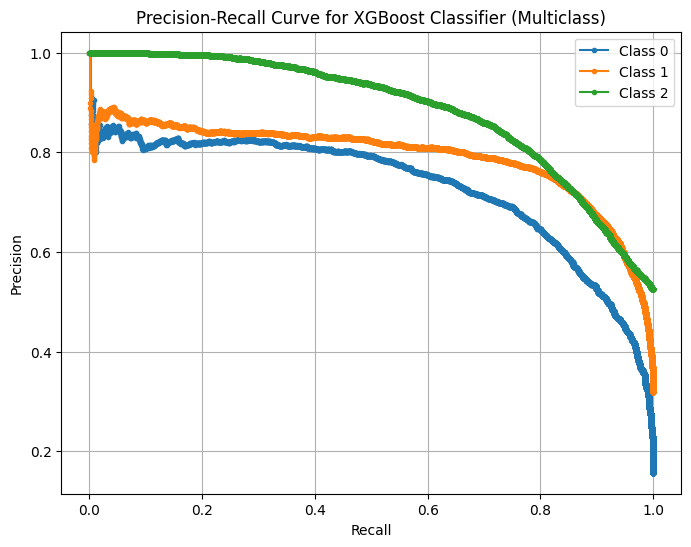

In [91]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred = xgb_classifier.predict(X_test)

print("XGBoost Classifier Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

xgb_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(xgb_metrics, '\n')

xgb_boost_y_proba = xgb_classifier.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(xgb_classifier.classes_)):
    precision, recall, _ = precision_recall_curve((y_test == xgb_classifier.classes_[i]).astype(int), xgb_boost_y_proba[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {xgb_classifier.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost Classifier (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()


In [62]:
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix

lgb_classifier = lgb.LGBMClassifier()

lgb_classifier.fit(X_train, y_train)

y_pred = lgb_classifier.predict(X_test)

print("LightGBM Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

lgb_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(lgb_metrics, '\n')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3969
[LightGBM] [Info] Number of data points in the train set: 66074, number of used features: 22
[LightGBM] [Info] Start training from score -1.856207
[LightGBM] [Info] Start training from score -1.157314
[LightGBM] [Info] Start training from score -0.635999
LightGBM Results:
              precision    recall  f1-score   support

           0       0.64      0.68      0.66      2589
           1       0.76      0.72      0.74      5260
           2       0.77      0.77      0.77      8670

    accuracy                           0.74     16519
   macro avg       0.72      0.73      0.72     16519
weighted avg       0.74      0.74      0.74     16519

Confusion Matrix:
[[1768   47  774]
 [ 198 3805 1257]
 [ 781 1183 6706]] 

Overall Wei

Learning rate set to 0.097982
0:	learn: 1.0358971	total: 115ms	remaining: 1m 55s
1:	learn: 0.9854306	total: 167ms	remaining: 1m 23s
2:	learn: 0.9422125	total: 217ms	remaining: 1m 12s
3:	learn: 0.9061278	total: 273ms	remaining: 1m 8s
4:	learn: 0.8769644	total: 326ms	remaining: 1m 4s
5:	learn: 0.8520582	total: 425ms	remaining: 1m 10s
6:	learn: 0.8316260	total: 567ms	remaining: 1m 20s
7:	learn: 0.8139767	total: 673ms	remaining: 1m 23s
8:	learn: 0.7977136	total: 774ms	remaining: 1m 25s
9:	learn: 0.7833296	total: 847ms	remaining: 1m 23s
10:	learn: 0.7717678	total: 911ms	remaining: 1m 21s
11:	learn: 0.7611353	total: 1.03s	remaining: 1m 25s
12:	learn: 0.7522543	total: 1.13s	remaining: 1m 25s
13:	learn: 0.7445157	total: 1.22s	remaining: 1m 25s
14:	learn: 0.7370177	total: 1.32s	remaining: 1m 26s
15:	learn: 0.7308273	total: 1.43s	remaining: 1m 27s
16:	learn: 0.7248707	total: 1.54s	remaining: 1m 29s
17:	learn: 0.7197350	total: 1.63s	remaining: 1m 28s
18:	learn: 0.7149281	total: 1.72s	remaining: 1

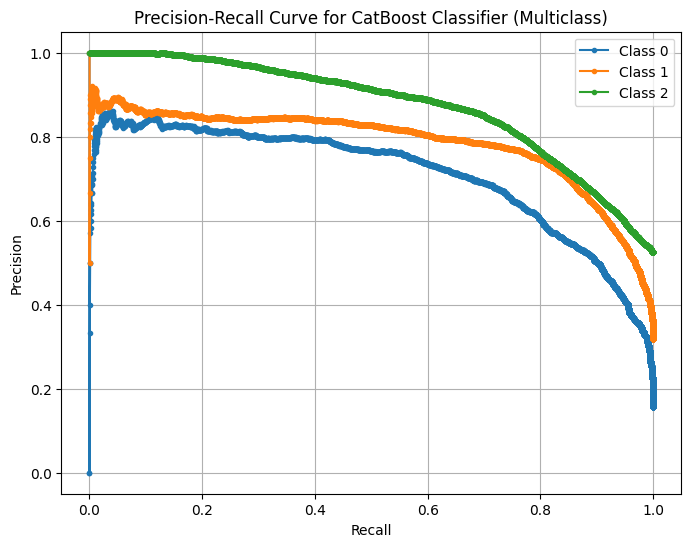

In [83]:
! pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

catboost_classifier = CatBoostClassifier()

catboost_classifier.fit(X_train, y_train)

y_pred = catboost_classifier.predict(X_test)

print("CatBoost Results:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred), '\n')

cat_metrics = weighted_metrics(y_test, y_pred)
print("Overall Weighted Average Metrics of the model")
print(cat_metrics, '\n')

cat_boost_y_proba = catboost_classifier.predict_proba(X_test)

plt.figure(figsize=(8, 6))
for i in range(len(catboost_classifier.classes_)):
    precision, recall, _ = precision_recall_curve((y_test == catboost_classifier.classes_[i]).astype(int), cat_boost_y_proba[:, i])
    plt.plot(recall, precision, marker='.', label=f'Class {catboost_classifier.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for CatBoost Classifier (Multiclass)')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
metrics_list = [logit_metrics, decision_tree_metrics, random_forest_metrics, gradient_metrics, knn_metrics, nb_metrics, adaboost_metrics, xgb_metrics, lgb_metrics, cat_metrics]
classifier_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes", "AdaBoost", "XGBoost", "LightGBM", "CatBoost"]

metrics_df = pd.DataFrame(columns=["Classifier", "Accuracy", "Precision", "Recall", "F1_score"])

for i, metrics in enumerate(metrics_list):
    metrics_df.loc[i] = [classifier_names[i]] + list(metrics.values())

metrics_df.set_index("Classifier", inplace=True)

print(metrics_df.to_string())

                     Accuracy  Precision  Recall  F1_score
Classifier                                                
Logistic Regression      0.61       0.62    0.61      0.61
Decision Tree            0.71       0.71    0.71      0.71
Random Forest            0.80       0.80    0.80      0.80
Gradient Boosting        0.71       0.71    0.71      0.71
KNN                      0.62       0.62    0.62      0.62
Naive Bayes              0.54       0.55    0.54      0.54
AdaBoost                 0.66       0.66    0.66      0.66
XGBoost                  0.77       0.77    0.77      0.77
LightGBM                 0.74       0.74    0.74      0.74
CatBoost                 0.76       0.76    0.76      0.76


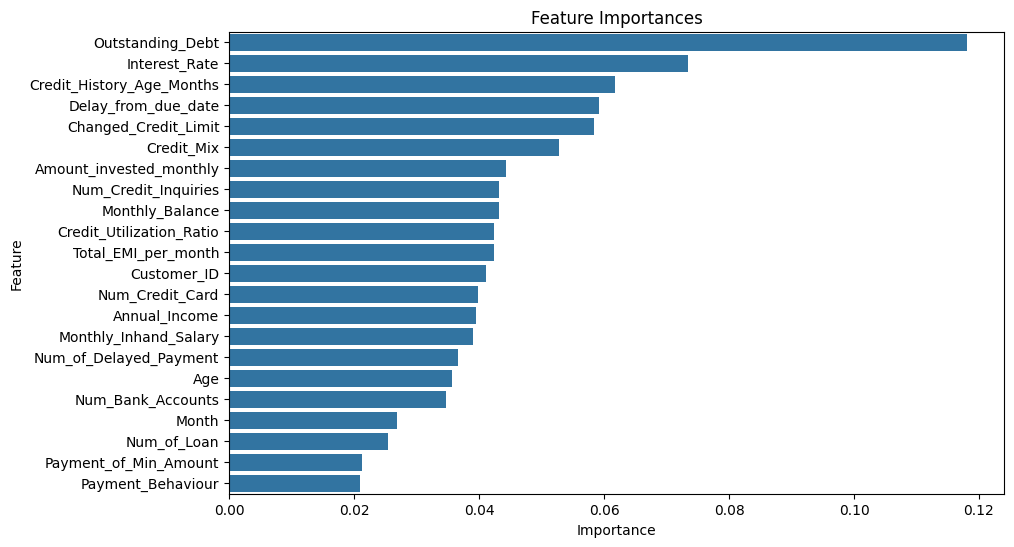

In [96]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importances = random_forest.feature_importances_

feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()


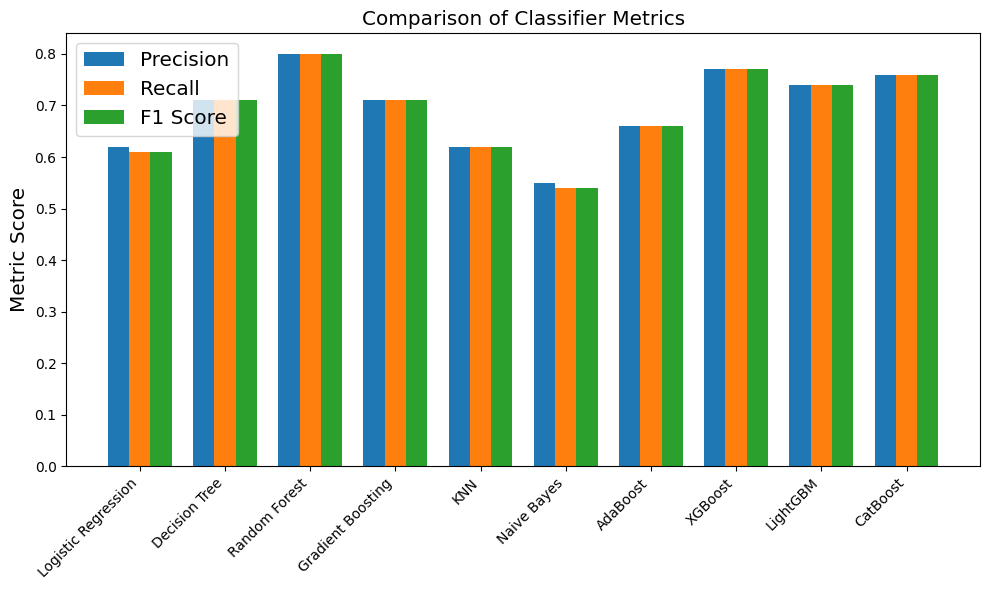

In [97]:
import matplotlib.pyplot as plt
import numpy as np

metrics_list = [logit_metrics, decision_tree_metrics, random_forest_metrics, gradient_metrics, knn_metrics, nb_metrics, adaboost_metrics, xgb_metrics, lgb_metrics, cat_metrics]
classifier_names = ["Logistic Regression", "Decision Tree", "Random Forest", "Gradient Boosting", "KNN", "Naive Bayes", "AdaBoost", "XGBoost", "LightGBM", "CatBoost"]

plt.figure(figsize=(10, 6))
bar_width = 0.25

x_pos = np.arange(len(metrics_list))

rects1 = plt.bar(x_pos, [metric['Precision'] for metric in metrics_list], bar_width, label='Precision')
rects2 = plt.bar([x + bar_width for x in x_pos], [metric['Recall'] for metric in metrics_list], bar_width, label='Recall')
rects3 = plt.bar([x + bar_width * 2 for x in x_pos], [metric['F1_score'] for metric in metrics_list], bar_width, label='F1 Score')

plt.xticks(x_pos + bar_width, classifier_names, rotation=45, ha='right')
plt.legend(loc='upper left', fontsize='x-large')
plt.ylabel('Metric Score', fontsize='x-large')
plt.title('Comparison of Classifier Metrics', fontsize='x-large')
plt.tight_layout()
plt.show()


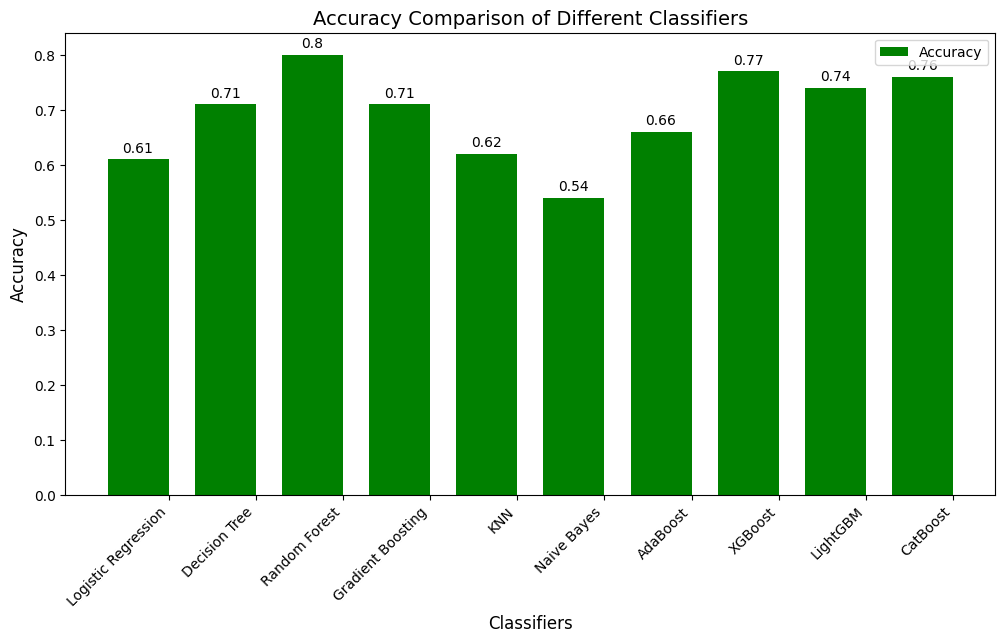

In [98]:
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost']
values = [logit_metrics['Accuracy'], decision_tree_metrics['Accuracy'], random_forest_metrics['Accuracy'], gradient_metrics['Accuracy'], knn_metrics['Accuracy'], nb_metrics['Accuracy'], adaboost_metrics['Accuracy'], xgb_metrics['Accuracy'], lgb_metrics['Accuracy'], cat_metrics['Accuracy']]

x = np.arange(len(labels))
width = 0.7

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - width/2, values, width, label='Accuracy', color='green')

for rect in rects1:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_xlabel('Classifiers', fontsize=12)
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('Accuracy Comparison of Different Classifiers', fontsize=14)
ax.legend()

plt.show()


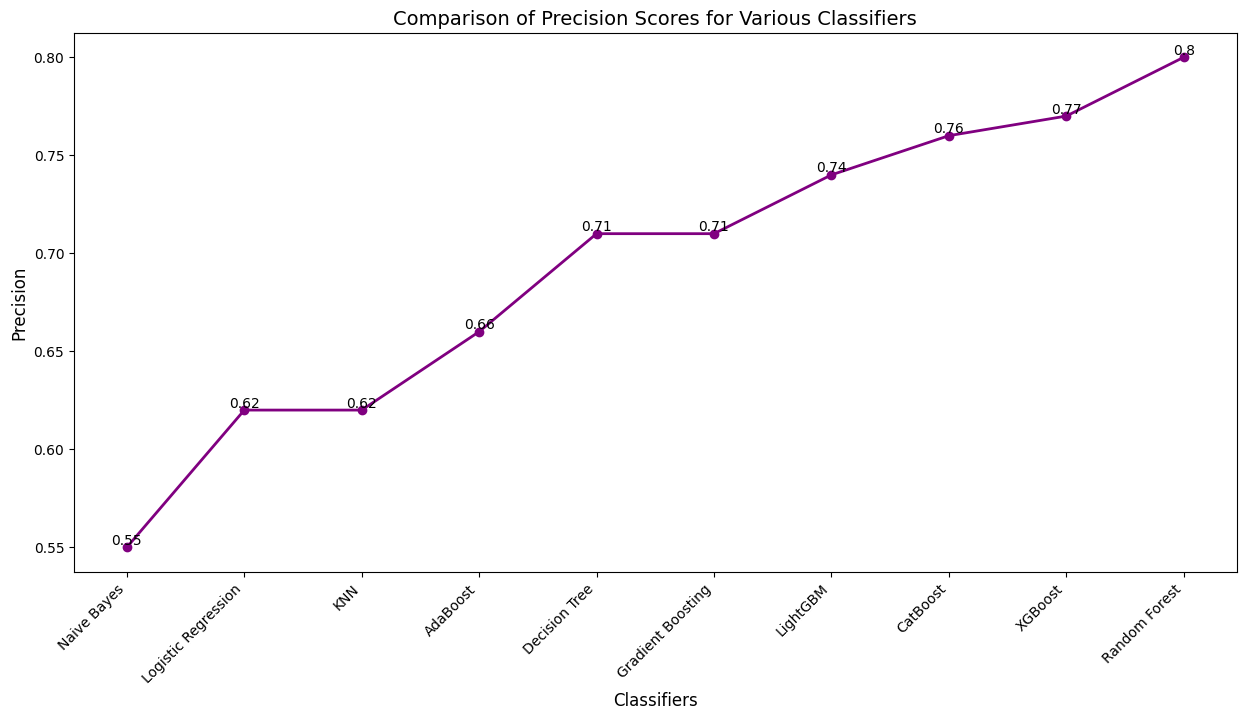

In [99]:
metrics_list = [logit_metrics, decision_tree_metrics, random_forest_metrics, gradient_metrics, knn_metrics, nb_metrics, adaboost_metrics, xgb_metrics, lgb_metrics, cat_metrics]
labels = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'KNN', 'Naive Bayes', 'AdaBoost', 'XGBoost', 'LightGBM', 'CatBoost']

metrics_list, labels = zip(*sorted(zip(metrics_list, labels), key=lambda x: x[0]['Precision']))

plt.figure(figsize=(15, 7))

x = range(len(labels))
y = [metric['Precision'] for metric in metrics_list]

plt.plot(x, y, color='purple', marker='o', linestyle='-', linewidth=2)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Comparison of Precision Scores for Various Classifiers', fontsize=14)
plt.xticks(x, labels, rotation=45, ha='right')

for i, val in enumerate(y):
    plt.text(i, val, str(round(val, 2)), ha='center', va='bottom')

plt.show()